# Starbucks and MTA Data

![starbucks](images/Starbucks_Corporation_Logo_2011.svg.png)
![mta](images/800px-MTA_New_York_City_Subway_logo.svg.png)

## Problem Statement:
Starbucks is a premier international coffee franchise with over 30,000 locations throughout the world. With New York City being one of the top cities to consume coffee, in all of the United States, Starbucks has imprinted its mark throughout the city, opening up hundreds of stores throughout the 5 boroughs, with 240 being specifically in Manhattan. 

The Metropolitan Transportation Authority (MTA) has become a very viable and popular means of transportation for people in New York City, seamlessly aiding people in getting to various part of the city that may be too far to walk or too expensive to take a taxi/uber to get too. With this means of transportation, thousands of people go through these arrays of turnstiles which leads to greater foot traffic in these general areas at certain times which would make it prime real estate to open up a Starbucks store. With looking at this turnstile data that the MTA provided, can we identify trends happening around certain subway stations that can possibly lead to expansion opportunities as well as mitigate risk with certain stores that aren’t becoming as popular.

With our search, we will want to be focusing in on the E line to evaluate the best opportunity. The E line was chosen as not only does it cover major parts of manhattan, it also extends throughout queens with the final stop being in Jamacia which is where many people come and transfer to take the air-train to JFK Airport. 

We will measure success on if we can build a model that beats the Yearly average of total turnstiles at a particular station and if it can predict and upward trend for future predictions.

We will assess our data with a time series analysis, using historical data of these stations and turnstiles to predict future foot traffic in each of the various locations. We will use both Auto Regression Integrated Moving Average (ARIMA) and the Seasonal Auto Regression Integrated Moving Average (SARIMA) model to evaluate and use regression, specifically Root Mean Squared Error (RMSE), to score our models. 


## Executive Summary

When I started off on this project, I knew I had to find two different data sets with one being information on Starbucks store location and one being with MTA Turnstile information. What ended up really happening as I made my way through was that I needed to find a third dataset that I was not expecting to do: a dataset on stations and their locations. By finding this third data set, I was now able to essentially merge my Starbucks Store data with the closest store to these subway stops. 

When looking through the original Starbucks data, they had information on Starbucks located all throughout the United States. I first needed to filter through all stores that were just located in New York and knowing that I was going to be focusing in on E line, manually filter through  all the cities that the E runs through to obtain the closest Starbucks. From here, we ran the address through  the googlemaps API and were able to obtain more specific Latitude and Longitude locations that we are able to now use to calculate our distances to the Subway stations. 

After filtering out the Subway Stations data with only those with stations along the E line, we were ready to calculate our first, second, and third closest Starbucks stores to each location. To do so, we calculated the Euclidian distance using the Pythagorean theorem with our Latitude being our X coordinates and Longitude being our y coordinates as shown in the image below:
<img src = "euclidian.jpg" width ='200px'>
By subtracting both latitude and longitudes, squaring them, adding them together, and finally taking the square root, we came to our metrics of finding the closest store. With this formula as well as taking the closest store in order, we were also able to take the second and third closest store as well and then add them to our data frame. The reasoning being that people may look to grab Starbucks at a store that might be closer to their office so we wanted to look at the surrounding area as well. The functions created below helped expedite the process in finding these distances as well as stores:
```python
closest_station(40.757308, -73.989735, starbucks['latitude'], starbucks['longitude'])
#0.00061
closest_store(40.757308, -73.989735, starbucks['latitude'], starbucks['longitude'])
#'42nd & 8th'   
```

Our next steps were to get the information we just gathered onto the turnstiles. To do this, we needed to find a way to match the station names up. This ended up requiring a manually entry and matching of each station to each other. To aid in the process, we used the get_close_match function to try and find the similar names of the stations:
```python
get_close_matches('TIMES SQUARE-42ND ST' ,stations['station'].unique(), n=5)
#['TIMES SQUARE-42ND ST', 'TIMES SQUARE']
```

The last thing that we needed to do were get the turns in per day as the turnstiles are a cumulative metric. This metric is running total of turns up until the turnstile resets, in which the counter will restart. To get this, what we had to do was to individually group each stations turnstile individually, take the .max() at the end of the day per the turnstile, less the .min() which represents the cumulative total of the beginning of the day, and get the total of that day. Due to the reset though however, we had to limit to under 30,000 turns as a mean of countering the turnstiles that may of has a reset on a particular day. 

Some initial findings that we saw were that along the E line, we found that the most turnstiles were happening at both Port Authority as well as Penn Station as these are two main stations where a lot of travelers from both Long Island and New Jersey come in. This led us to choosing Port Authority as our first station so we can examine and see if we are able to predict on a high traffic area. Other finding’s we saw that the most turnstiles that were happening outside of Manhattan were happening at Jackson Heights. This is an express stop on the station that we assume has a lot of foot traffic due to the more people possibly choosing this stop rather than heading to a closer stop that may be local.

Based on the distance metric we used to calculate how far stores are from certain stations, I decided to take the product of all three as a means of better gaging the area around and how many stores are nearby. This would show me that if there was an area with a higher product number, that there are less stores opened around that area and we would like to see if there would be a station high on both these charts. We found when calculating this that the station with the farthest product of Starbucks distance would be an area for a possible store. What we discovered was that the that station with the highest distance product was actually Jackson Heights. This was a surprising find for me as for an area that does have the most turnstiles should have more stores nearby you would expect. This then led me to want to do a deeper dive into if there was an opportunity to predict a positive trend in turnstiles.

## Table of Contents

- [1.4 Acquiring and Preprocessing Data](#Acquiring-and-Preprocessing-Data)
- [1.5 Data Dictionary](#Data-Dictionary)
- [1.6 Loading Libraries](#Loading-Libraries)
- [1.7 Loading Data](#Loading-Data)
- [1.8 Preliminary EDA](#Preliminary-EDA)
- [1.9 Featured Engineering](#CFeatured-Engineering)
- [1.10 EDA](#EDA)
    - [1.10.1 Port Authority EDA](#Port-Authority-EDA)
    - [1.10.2 Jackson Heights EDA](#Jackson-Heights-EDA)
- [1.11 Modeling](#Modeling)
    - [1.11.1 Port Authority Modeling](#Port-Authority-Modeling)
        - [1.11.1.1 Port Authority ARIMA Model](#Port-Authority-ARIMA-Modeling)
        - [1.11.1.1 Port Authority SARIMA Model](#Port-Authority-SARIMA-Modeling)
    - [1.11.2 Jackson Heights Modeling](#Jackson-Heights-Modeling)
        - [1.11.1.2 Jackson Heights ARIMA Model](#Port-Authority-ARIMA-Modeling)
        - [1.11.1.2 Port Authority SARIMA Model](#Port-Authority-SARIMA-Modeling)
- [1.12 Model Selection](#Model-Selection)
    - [1.12.1 Port Authority Model Selection](#Port-Authority-Model-Selection)
    - [1.12.2 Jackson Heights Model Selection](#Jackson-Heights-Model-Selection)
- [1.13 Model Evaluation](#Model-Evaluation)
    - [1.13.1 Port Authority Model Evaluation](#Port-Authority-Model-Evaluation)
    - [1.13.2 Jackson Heights Model Evaluation](#Jackson-Heights-Model-Evaluation)
- [1.14 Conclusion and Next Steps](#Conclusion-and-Next-Steps:)

## Acquiring and Preprocessing Data

Below is where :
- [Starbucks Dataset](https://www.kaggle.com/starbucks/store-locations/data)
- [MTA Turnstiles Dataset](https://www.kaggle.com/new-york-state/nys-turnstile-usage-data)
- [MTA Station Entrances Dataset](http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv)

For cleaning and preprocessing on the Starbucks location and Station location, please check out the 

## Data Dictionary

|Feature|Type|Description|
|---|---|---|
|**C/A**|*object*|Control Area name/Booth name. This is the internal identification of a booth at a given station.|
|**UNIT**|*object*|Remote unit ID of station|
|**SCP**|*object*|Subunit/Channel/position represents a specific address for a given device|
|**Station**|*object*|Name assigned to the subway station by operations planning.| 
|**Line Name**|*object*|Train lines stopping at this location. Can contain up to 20 single character identifier. When more than one train line appears, it is usually intercepting train lines, in major stations where the passenger can transfer between any one of the lines.|
|**Division**|*object*|Each section of the system is assigned a unique line name, usually paired with its original operating company or division (Brooklyn– Manhattan Transit Corporation (BMT), Interborough Rapid Transit Company (IRT), and Independent Subway System (IND).|
|**month**|*object*|Month of year that individual turnstile data is related too.|
|**day**|*object*|Day of Week that individual turnstile data is related too.|
|**Station_Latitude**|*float*|Latitude coordinates of station |
|**Station_Longitude**|*float*|Longitude coordinates of station|
|**first_closest**|*float*|Distance of the first closest store|
|**first_closest_store**|*object*|Name of the first closest store|
|**second_closest**|*float*|Distance of the second closest store|
|**second_closest_store**|*object*|Name of the second closest store|
|**third_closest**|*float*|Distance of the third closest store|
|**third_closest_store**|*object*|Name of the third closest store|
|**Entries**|*int*|number of entries at that turnstile|
|**Exits**|*int*|number of exits at that turnstile|
|**total_turns**|*int*|combined entries and exits at that turnstile|
|**avg_distance**|*float*|The first, second, and third closest numbers multiplied together|


## Loading Libraries 

In [1]:
#cleaning libraries
import requests
import pandas as pd
import numpy as np
from PIL import Image
from difflib import get_close_matches 

#evaluation
from sklearn.model_selection import train_test_split
import folium
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

#graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading Data

Load the stations CSV we created in the Starbucks Cleaning notebook

In [2]:
stations = pd.read_csv('Data/stations.csv')
stations.head()

,Station_Latitude,Station_Longitude,Route_8,Route_9,Route_10,Route_11,ADA,Free_Crossover,Latitude,Longitude,station,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store
0,40.740893,-74.001690,NaN,NaN,NaN,NaN,1.0,1.0,40.740612,-74.001896,14th St,0.001861,8th Ave just south of 14th St,0.002499,19th & 8th,0.003523,Greenwich Ave at Bank St
1,40.745906,-73.998041,NaN,NaN,NaN,NaN,0.0,1.0,40.745990,-73.997927,23rd St,0.003181,24th & 7th,0.003717,19th & 8th,0.003729,23rd & 1st
2,40.747846,-73.946000,NaN,NaN,NaN,NaN,0.0,1.0,40.747807,-73.945829,23rd St-Ely Av,0.013156,Roosevelt Island,0.021601,69th & First,0.023777,75th & First
3,40.752287,-73.993391,NaN,NaN,NaN,NaN,1.0,1.0,40.752218,-64.744260,34th St,0.001281,"Penn Station by A,C,E",0.001281,One Penn Plaza,0.003779,32nd btwn 6th & 7th
4,40.757308,-73.989735,1.0,2.0,3.0,7.0,1.0,1.0,40.757358,-73.989816,42nd St,0.000612,42nd & 8th,0.000680,Union Square East,0.001043,43rd & 8th


Load in the 2017 Turnstile data that we were able to obtain from the MTA website

In [3]:
df_2017 = pd.read_csv('Data/turnstile-usage-data-2017.csv')


In [4]:
df_2017.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-22T00:00:00.000,23:00:00,REGULAR,6455787,2184977
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-22T00:00:00.000,19:00:00,REGULAR,6455505,2184926
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-22T00:00:00.000,15:00:00,REGULAR,6454819,2184867
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-22T00:00:00.000,11:00:00,REGULAR,6454437,2184773
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-22T00:00:00.000,07:00:00,REGULAR,6454285,2184501


## Preliminary EDA

Within the Preliminary EDA, we will setup one Dataframe that will be used to start feature engineering and setting up various graphs to look at

In [5]:
df_2017.describe()

,Entries,Exits
count,8.880000e+06,8.880000e+06
mean,3.235230e+07,2.559780e+07
std,1.900627e+08,1.670014e+08
min,0.000000e+00,0.000000e+00
25%,7.124620e+05,3.555350e+05
50%,2.896117e+06,1.623704e+06
75%,8.249612e+06,4.641913e+06
max,2.032571e+09,2.140537e+09


When looking at the decribe statistics, the maximum do look high as these are cumulative totals. We will adjust to make them daily totals later on. 

In [6]:
df_2017.isnull().sum()

C/A                                                           0
Unit                                                          0
SCP                                                           0
Station                                                       0
Line Name                                                     0
Division                                                      0
Date                                                          0
Time                                                          0
Description                                                   0
Entries                                                       0
Exits                                                         0
dtype: int64

Noted that there are not null values within the data set

In [7]:
len(df_2017['Line Name'])

8880000

In [8]:
df_2017['Line Name'].unique()

array(['NQR456W', 'NQRW', 'ACENQRS1237W', 'BDFMNQRW', 'NRW', 'LNQR456W',
       'JNQRZ6W', 'RNW', 'R1W', 'FJMZ', 'JZ', 'JZ456', 'ACJZ2345', 'BQ',
       'S', 'S2345', 'BQS', 'Q', 'R2345', 'R', 'BDNQR', 'BDNQR2345',
       'DFGMNR', 'DNR', 'N', 'ND', 'D', 'DFNQ', 'ACEL', 'FLM123', 'L',
       'LG', 'LM', 'JMZ', 'JM', 'J', 'A', 'E', 'M', 'AC1', 'C', 'ABCD',
       'BC', 'ACBD', 'ABCD1', 'ACENGRS1237W', 'ACE', 'CE', 'ABCDEFM',
       'ACE23', '2345ACJZ', 'AC', 'ACF', 'ACG', 'ACS', 'ACJLZ', 'AS',
       'BD', 'BD4', 'BDE', 'EM', 'EM6', 'EMG', 'EMR', 'MR', 'EFMR7',
       'EFMR', 'EF', 'F', 'G', 'GL', 'BDFM', 'BDFM7', 'FM', 'BDFQ6', 'FG',
       '1', 1, '1RW', '23', '123', '123FLM', 123, '1237ACENQRSW', '1ABCD',
       45], dtype=object)

When we tried to filter out the data frame and create a new one with the E line only, we had troubles as there are some values within the line column that needed to be changed due to them being integers. since trying to string the column didnt work, we simply filtered them out of the dataframe.

In [9]:
df_2017 = df_2017[(df_2017['Line Name']!= 1) & (df_2017['Line Name']!= 123) & (df_2017['Line Name']!= 45)]


In [10]:
df_2017.loc[df_2017["Station"] == "50 ST","Line Name"]= df_2017.loc[df_2017["Station"] == "50 ST","Line Name"].replace('D', 'E')

As we pulled out values and plotted them on a map, I noticed that there was a missing station due to my subject knowledge of the E line and that the 50th station was not there. When investigating the cause, I saw that the data set had the 'D' line in rather than teh 'E'. With a simple replace, we were able to resolve this and ensured we had the correct stations for out data. When at the real line on https://moovitapp.com/index/en/public_transit-line-E-NYCNJ-121-855111-513452-0 , there were also late night stations on the E line in Queens that werent in our data. Since these are stations that arent open all day, we deemed that they would not be necessary for our analysis and left them out.

In [11]:
df_e = df_2017.loc[df_2017['Line Name'].str.contains('E'),:]

Created a dataframe with just the stations that contain the E line

In [12]:
df_e['Station'].sort_values().unique()

array(['14 ST', '23 ST', '34 ST-PENN STA', '42 ST-PORT AUTH',
       '5 AV/53 ST', '50 ST', '7 AV', '75 AV', '8 AV', 'BRIARWOOD',
       'CANAL ST', 'CHAMBERS ST', 'COURT SQ', 'COURT SQ-23 ST',
       'FOREST HILLS 71', 'JFK JAMAICA CT1', 'JKSN HT-ROOSVLT',
       'KEW GARDENS', 'LEXINGTON AV/53', 'QUEENS PLAZA', 'SPRING ST',
       'TIMES SQ-42 ST', 'W 4 ST-WASH SQ', 'WORLD TRADE CTR'],
      dtype=object)

In [13]:
len(df_e)

890571

In [14]:
del(df_2017)

well delete the old dataframe as it is over 8 million rows and takes up a lot of space

In [15]:
def date_manip(df):
    new_date = [i.split('T')[0] for i in df['Date']]
    df['Date'] = new_date
    df['date_time'] = pd.to_datetime(df.Date + ' ' + df.Time)
    return df.head()

Created a function that will manipulate the date so that it is in Date and Time for us to set as our index on when we complete the cleaning. 

In [16]:
date_manip(df_e)

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,date_time
118432,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,23:00:00,REGULAR,7357995,8791810,2017-12-22 23:00:00
118433,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,19:00:00,REGULAR,7357446,8791371,2017-12-22 19:00:00
118434,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,15:00:00,REGULAR,7356450,8790311,2017-12-22 15:00:00
118435,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,11:00:00,REGULAR,7355728,8789251,2017-12-22 11:00:00
118436,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,07:00:00,REGULAR,7355235,8787730,2017-12-22 07:00:00


We will create several functions for us to run to extract exact month and day of the week which we will use later on to examine the data

In [17]:
def doy(day):
    return day.day_name()

In [18]:
def moy(month):
    return month.month_name()

In [19]:
def map_day_to_df(df):
    df['day'] = df['date_time'].map(doy)
    return df.head()

In [20]:
def map_month_to_df(df):
    df['month'] = df['date_time'].map(moy)
    return df.head()

In [21]:
map_day_to_df(df_e)

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,date_time,day
118432,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,23:00:00,REGULAR,7357995,8791810,2017-12-22 23:00:00,Friday
118433,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,19:00:00,REGULAR,7357446,8791371,2017-12-22 19:00:00,Friday
118434,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,15:00:00,REGULAR,7356450,8790311,2017-12-22 15:00:00,Friday
118435,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,11:00:00,REGULAR,7355728,8789251,2017-12-22 11:00:00,Friday
118436,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,07:00:00,REGULAR,7355235,8787730,2017-12-22 07:00:00,Friday


Extracted the day of the week

In [22]:
map_month_to_df(df_e)

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,date_time,day,month
118432,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,23:00:00,REGULAR,7357995,8791810,2017-12-22 23:00:00,Friday,December
118433,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,19:00:00,REGULAR,7357446,8791371,2017-12-22 19:00:00,Friday,December
118434,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,15:00:00,REGULAR,7356450,8790311,2017-12-22 15:00:00,Friday,December
118435,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,11:00:00,REGULAR,7355728,8789251,2017-12-22 11:00:00,Friday,December
118436,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,07:00:00,REGULAR,7355235,8787730,2017-12-22 07:00:00,Friday,December


Extracted the months

The next step we had to take was to find a way to merge now our two station data sets together, one with the station locations and closest starbucks and the other with the turnstile info. For that, we needed to get the station names to match up together. We had to make a conversion dictionary that would then be mapped to our station location dataframe as a means of merging them together. With the help of the get_close_matches fucntion. this expediated the process for us to search within the unique values of the turnstile dataframe to match the closest named station which did work at about a 75% clip. The other 25% where it wasnt able to indentify, we had to mannually go through the list to figure out the matching station.

In [23]:
stations['station'] = stations['station'].str.upper()

In [24]:
stations.head()

,Station_Latitude,Station_Longitude,Route_8,Route_9,Route_10,Route_11,ADA,Free_Crossover,Latitude,Longitude,station,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store
0,40.740893,-74.001690,NaN,NaN,NaN,NaN,1.0,1.0,40.740612,-74.001896,14TH ST,0.001861,8th Ave just south of 14th St,0.002499,19th & 8th,0.003523,Greenwich Ave at Bank St
1,40.745906,-73.998041,NaN,NaN,NaN,NaN,0.0,1.0,40.745990,-73.997927,23RD ST,0.003181,24th & 7th,0.003717,19th & 8th,0.003729,23rd & 1st
2,40.747846,-73.946000,NaN,NaN,NaN,NaN,0.0,1.0,40.747807,-73.945829,23RD ST-ELY AV,0.013156,Roosevelt Island,0.021601,69th & First,0.023777,75th & First
3,40.752287,-73.993391,NaN,NaN,NaN,NaN,1.0,1.0,40.752218,-64.744260,34TH ST,0.001281,"Penn Station by A,C,E",0.001281,One Penn Plaza,0.003779,32nd btwn 6th & 7th
4,40.757308,-73.989735,1.0,2.0,3.0,7.0,1.0,1.0,40.757358,-73.989816,42ND ST,0.000612,42nd & 8th,0.000680,Union Square East,0.001043,43rd & 8th


In [25]:
from difflib import SequenceMatcher,get_close_matches

SequenceMatcher(None,'Prospect Park' , 'PROSPECT PARK').ratio()

0.23076923076923078

In [26]:
stations['station'].sort_values().unique()

array(['14TH ST', '23RD ST', '23RD ST-ELY AV', '34TH ST', '42ND ST',
       '45 RD-COURT HOUSE SQ', '50TH ST', '51ST ST', '5TH AV-53RD ST',
       '75TH AV', '7TH AV', '8TH AV', 'BROADWAY-74TH ST', 'CANAL ST',
       'CHAMBERS ST', 'FOREST HILLS-71ST AV',
       'JACKSON HEIGHTS-ROOSEVELT AVE', 'JAMAICA-VAN WYCK',
       'KEW GARDENS-UNION TURNPIKE', 'LEXINGTON AV-53RD ST', 'PARK PLACE',
       'PARSONS BLVD-ARCHER AV - JAMAICA CENTER', 'QUEENS PLAZA',
       'SPRING ST', 'SUTPHIN BLVD-ARCHER AV - JFK', 'TIMES SQUARE',
       'TIMES SQUARE-42ND ST', 'WEST 4TH ST', 'WORLD TRADE CENTER'],
      dtype=object)

In [27]:
df_e['Station'].sort_values().unique()

array(['14 ST', '23 ST', '34 ST-PENN STA', '42 ST-PORT AUTH',
       '5 AV/53 ST', '50 ST', '7 AV', '75 AV', '8 AV', 'BRIARWOOD',
       'CANAL ST', 'CHAMBERS ST', 'COURT SQ', 'COURT SQ-23 ST',
       'FOREST HILLS 71', 'JFK JAMAICA CT1', 'JKSN HT-ROOSVLT',
       'KEW GARDENS', 'LEXINGTON AV/53', 'QUEENS PLAZA', 'SPRING ST',
       'TIMES SQ-42 ST', 'W 4 ST-WASH SQ', 'WORLD TRADE CTR'],
      dtype=object)

In [28]:
get_close_matches('TIMES SQUARE-42ND ST' ,stations['station'].unique(), n=5)

['TIMES SQUARE-42ND ST', 'TIMES SQUARE']

This above is an example of how the get_close_matches function worked. This was run with all the unique values we had in the df_e dataframe to match the values in the df dataframe.

In [29]:
conv_station_dict = {
    'TIMES SQUARE-42ND ST': 'TIMES SQ-42 ST', 
    '8TH AV': '8 AV', 
    'SUTPHIN BLVD-ARCHER AV - JFK':'JFK JAMAICA CT1', 
    '42ND ST': '42 ST-PORT AUTH',
    '34TH ST': '34 ST-PENN STA', 
    '23RD ST':'23 ST', 
    '14TH ST':'14 ST', 
    'WEST 4TH ST': 'W 4 ST-WASH SQ', 
    'SPRING ST': 'SPRING ST',
    'CANAL ST': 'CANAL ST', 
    'CHAMBERS ST': 'CHAMBERS ST', 
    'WORLD TRADE CENTER': 'WORLD TRADE CTR', 
    '7TH AV': '7 AV', 
    '5TH AV-53RD ST': '5 AV/53 ST',
    'LEXINGTON AV-53RD ST': 'LEXINGTON AV/53', 
    '45 RD-COURT HOUSE SQ': 'COURT SQ-23 ST', 
    'QUEENS PLAZA': 'QUEENS PLAZA',
    'JACKSON HEIGHTS-ROOSEVELT AVE': 'JKSN HT-ROOSVLT', 
    'FOREST HILLS-71ST AV': 'FOREST HILLS 71', 
    '75TH AV': '75 AV', 
    'KEW GARDENS-UNION TURNPIKE':'KEW GARDENS',
    'JAMAICA-VAN WYCK': 'BRIARWOOD', 
    '50TH ST' : '50 ST'
}

stations['station'] = stations['station'].map(conv_station_dict)

In [30]:
stations['station'].unique()

array(['14 ST', '23 ST', nan, '34 ST-PENN STA', '42 ST-PORT AUTH',
       'COURT SQ-23 ST', '50 ST', '5 AV/53 ST', '75 AV', '7 AV', '8 AV',
       'CANAL ST', 'CHAMBERS ST', 'FOREST HILLS 71', 'JKSN HT-ROOSVLT',
       'BRIARWOOD', 'KEW GARDENS', 'LEXINGTON AV/53', 'QUEENS PLAZA',
       'SPRING ST', 'JFK JAMAICA CT1', 'TIMES SQ-42 ST', 'W 4 ST-WASH SQ',
       'WORLD TRADE CTR'], dtype=object)

In [31]:
temp_stations = stations.dropna(axis=0, subset=['station'])

After now mapping the stations to map, we simply dropped all other stations that were not needed.

In [32]:
temp_stations.head()

,Station_Latitude,Station_Longitude,Route_8,Route_9,Route_10,Route_11,ADA,Free_Crossover,Latitude,Longitude,station,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store
0,40.740893,-74.001690,NaN,NaN,NaN,NaN,1.0,1.0,40.740612,-74.001896,14 ST,0.001861,8th Ave just south of 14th St,0.002499,19th & 8th,0.003523,Greenwich Ave at Bank St
1,40.745906,-73.998041,NaN,NaN,NaN,NaN,0.0,1.0,40.745990,-73.997927,23 ST,0.003181,24th & 7th,0.003717,19th & 8th,0.003729,23rd & 1st
3,40.752287,-73.993391,NaN,NaN,NaN,NaN,1.0,1.0,40.752218,-64.744260,34 ST-PENN STA,0.001281,"Penn Station by A,C,E",0.001281,One Penn Plaza,0.003779,32nd btwn 6th & 7th
4,40.757308,-73.989735,1.0,2.0,3.0,7.0,1.0,1.0,40.757358,-73.989816,42 ST-PORT AUTH,0.000612,42nd & 8th,0.000680,Union Square East,0.001043,43rd & 8th
5,40.747023,-73.945264,NaN,NaN,NaN,NaN,0.0,1.0,40.746223,-73.945461,COURT SQ-23 ST,0.014239,Roosevelt Island,0.022691,69th & First,0.023533,35th Ave and 37th St


In [33]:
temp_stations = temp_stations[['station', 'Station_Latitude', 'Station_Longitude', 'first_closest', 'first_closest_store', 'second_closest', 'second_closest_store', 'third_closest', 'third_closest_store']]

We wanted to extract just the columns that we were going to use in our stations dataframe to merge onto the new dataframe

In [34]:
temp_stations.rename(columns = {'station': 'Station'}, inplace = True)

Before we merged, we wanted to make sure that the column names we were merging on were the same

In [35]:
df_merged =  pd.merge(left = df_e,
        right = temp_stations,
        how ='inner',
        on = 'Station')

We have now our merged dataframe that we will work with

In [36]:
df_merged.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries',
       'Exits                                                     ',
       'date_time', 'day', 'month', 'Station_Latitude', 'Station_Longitude',
       'first_closest', 'first_closest_store', 'second_closest',
       'second_closest_store', 'third_closest', 'third_closest_store'],
      dtype='object')

When taking a look at the columns, we noticed that 'Exits' column needed to be corrected to remove the space

In [37]:
df_merged.rename(columns = {'Exits                                                     ': 'Exits'}, inplace = True)

In [38]:
df_merged = df_merged.set_index(['date_time'])

We now set our index to the new dataframe as the date


In [39]:
df_merged.sort_index(inplace = True, ascending = False)

In [40]:
df_merged.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,...,day,month,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store
date_time,,,,,,,,,,,,,,,,,,,,,
2017-12-22 23:00:00,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,23:00:00,REGULAR,7357995,...,Friday,December,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th
2017-12-22 23:00:00,N092,R029,03-03-01,CHAMBERS ST,ACE23,IND,2017-12-22,23:00:00,REGULAR,51957,...,Friday,December,40.714111,-74.008585,0.000759,Church Street & Murray,0.001266,Chambers and West Broadway,0.001697,Broadway at Barclay Str
2017-12-22 23:00:00,N092,R029,03-00-05,CHAMBERS ST,ACE23,IND,2017-12-22,23:00:00,REGULAR,2344966,...,Friday,December,40.714111,-74.008585,0.000759,Church Street & Murray,0.001266,Chambers and West Broadway,0.001697,Broadway at Barclay Str
2017-12-22 23:00:00,R151,R033,00-00-07,TIMES SQ-42 ST,1237ACENQRSW,IRT,2017-12-22,23:00:00,REGULAR,1245589,...,Friday,December,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th
2017-12-22 23:00:00,N092,R029,03-00-04,CHAMBERS ST,ACE23,IND,2017-12-22,23:00:00,REGULAR,10378155,...,Friday,December,40.714111,-74.008585,0.000759,Church Street & Murray,0.001266,Chambers and West Broadway,0.001697,Broadway at Barclay Str


For some locations, Starbucks is open 24 hours a day. However, normal operations for Starbucks during the week are between 07:00 AM – 11:00 PM. Since most of Starbucks business comes in during the morning time as their primary source of business is coffee, we will filter out the hours to 06:00 AM - 12:00PM.


In [41]:
df_merged.between_time('06:00:00', '12:00:00')

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,...,day,month,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store
date_time,,,,,,,,,,,,,,,,,,,,,
2017-12-22 12:00:00,N078,R175,01-00-01,14 ST,ACEL,IND,2017-12-22,12:00:00,REGULAR,557480,...,Friday,December,40.740893,-74.001690,0.001861,8th Ave just south of 14th St,0.002499,19th & 8th,0.003523,Greenwich Ave at Bank St
2017-12-22 12:00:00,N333B,R141,02-00-01,FOREST HILLS 71,EFMR,IND,2017-12-22,12:00:00,REGULAR,1449764,...,Friday,December,40.721691,-73.844521,0.001279,107-12 Continental Avenue,0.002948,7000 Austin Street,0.009394,Queens Blvd & 67th Rd
2017-12-22 12:00:00,N078,R175,01-00-01,14 ST,ACEL,IND,2017-12-22,12:00:00,REGULAR,557480,...,Friday,December,40.740893,-74.001690,0.001861,8th Ave just south of 14th St,0.002499,19th & 8th,0.003523,Greenwich Ave at Bank St
2017-12-22 12:00:00,N309A,R140,00-03-00,QUEENS PLAZA,EMR,IND,2017-12-22,12:00:00,REGULAR,97648,...,Friday,December,40.748973,-73.937243,0.015421,35th Ave and 37th St,0.017912,31-01 Broadway,0.018468,Roosevelt Island
2017-12-22 12:00:00,JFK03,R536,00-00-01,JFK JAMAICA CT1,E,IND,2017-12-22,12:00:00,REGULAR,110230,...,Friday,December,40.700486,-73.807969,0.003170,89th Ave & Sutphin Blvd.,0.027711,118-24 Queens Blvd,0.028819,St. John's University - Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 07:00:00,N067,R012,00-03-05,34 ST-PENN STA,ACE,IND,2016-12-31,07:00:00,REGULAR,4236992,...,Saturday,December,40.752287,-73.993391,0.001281,"Penn Station by A,C,E",0.001281,One Penn Plaza,0.003779,32nd btwn 6th & 7th
2016-12-31 07:00:00,N092,R029,03-00-02,CHAMBERS ST,ACE23,IND,2016-12-31,07:00:00,REGULAR,12629825,...,Saturday,December,40.714111,-74.008585,0.000759,Church Street & Murray,0.001266,Chambers and West Broadway,0.001697,Broadway at Barclay Str
2016-12-31 07:00:00,N091,R029,02-00-01,CHAMBERS ST,ACE23,IND,2016-12-31,07:00:00,REGULAR,5992116,...,Saturday,December,40.714111,-74.008585,0.000759,Church Street & Murray,0.001266,Chambers and West Broadway,0.001697,Broadway at Barclay Str


In [42]:
df_merged.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries', 'Exits', 'day', 'month',
       'Station_Latitude', 'Station_Longitude', 'first_closest',
       'first_closest_store', 'second_closest', 'second_closest_store',
       'third_closest', 'third_closest_store'],
      dtype='object')

In [43]:
df_merged.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries', 'Exits', 'day', 'month',
       'Station_Latitude', 'Station_Longitude', 'first_closest',
       'first_closest_store', 'second_closest', 'second_closest_store',
       'third_closest', 'third_closest_store'],
      dtype='object')

We now needed to find a way to get the turns per day. With this, we decided to group everything together with date and the turnstiles at each station. Since it is cumulative and By doing a max() - min() on this, we would be able to see the total turns per that line item we have. Since there were resets that occured also, we understand that some numbers may still stick out so a threshold of 30,000 that would be filtered out if you were above that number.

In [44]:
df= (df_merged.groupby(['C/A', 'Unit', 'SCP', 'Station','Line Name', 'Division', 'Date','month', 'day', 'Station_Latitude', 'Station_Longitude', 'first_closest',
                   'first_closest_store','second_closest', 'second_closest_store','third_closest',
                   'third_closest_store'])['Entries'].max() 
 - df_merged.groupby(['C/A', 'Unit', 'SCP', 'Station','Line Name', 'Division','Date','month', 'day', 'Station_Latitude', 'Station_Longitude','first_closest',
                     'first_closest_store','second_closest', 'second_closest_store','third_closest',
                     'third_closest_store'])['Entries'].min()).reset_index()




In [45]:
exits = (df_merged.groupby(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division','Date','month', 'day', 'first_closest',
                   'first_closest_store','second_closest', 'second_closest_store','third_closest',
                   'third_closest_store'])['Exits'].max() 
 - df_merged.groupby(['C/A', 'Unit', 'SCP', 'Station','Line Name', 'Division','Date','month', 'day','first_closest',
                     'first_closest_store','second_closest', 'second_closest_store','third_closest',
                     'third_closest_store'])['Exits'].min()).reset_index()




In [46]:
exits.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,month,day,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store,Exits
0,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2016-12-31,December,Saturday,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1607
1,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-01,January,Sunday,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1568
2,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-02,January,Monday,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1808
3,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-03,January,Tuesday,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3895
4,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-04,January,Wednesday,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,4108


In [47]:
df['Exits'] = exits['Exits']

In [48]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,month,day,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store,Entries,Exits
0,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2016-12-31,December,Saturday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,622,1607
1,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-01,January,Sunday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,767,1568
2,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-02,January,Monday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1192,1808
3,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-03,January,Tuesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3193,3895
4,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-04,January,Wednesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3124,4108


In [49]:
df['Date'] = pd.to_datetime(df['Date'])

In [50]:
df = df.set_index(['Date'])

We set our index to the day

In [51]:
df = df[(df['Entries'] < 30000) & (df['Entries'] < 30000) ]

In [52]:
df['Entries'].sort_values().tail(20)

Date
2017-07-15     7294
2017-07-15     7591
2017-07-08     7609
2017-07-15     7641
2017-08-07     7799
2017-08-01     8177
2017-08-09     8259
2017-08-08     8318
2017-07-08     8440
2017-08-04     8607
2017-08-03     8615
2017-08-10     8721
2017-10-15    13783
2017-06-15    17058
2017-12-19    18945
2017-09-19    22133
2017-08-26    23347
2017-10-22    29355
2017-04-12    29581
2017-09-30    29697
Name: Entries, dtype: int64

In [53]:
df['Entries'].sort_values().tail(20)

Date
2017-07-15     7294
2017-07-15     7591
2017-07-08     7609
2017-07-15     7641
2017-08-07     7799
2017-08-01     8177
2017-08-09     8259
2017-08-08     8318
2017-07-08     8440
2017-08-04     8607
2017-08-03     8615
2017-08-10     8721
2017-10-15    13783
2017-06-15    17058
2017-12-19    18945
2017-09-19    22133
2017-08-26    23347
2017-10-22    29355
2017-04-12    29581
2017-09-30    29697
Name: Entries, dtype: int64

In [54]:
(df['Exits'].sort_values().tail(20))

Date
2017-02-28     9783
2017-10-15     9800
2017-12-14     9833
2017-03-03     9833
2017-02-03     9842
2017-04-25     9849
2017-02-17     9875
2017-03-02     9904
2017-02-13    10003
2017-08-07    10027
2017-11-10    10104
2017-12-15    10191
2017-02-16    10204
2017-11-07    10954
2017-09-19    11514
2017-10-22    15716
2017-06-15    22306
2017-08-26    32009
2017-04-12    34678
2017-09-30    38249
Name: Exits, dtype: int64

In [55]:
df = df[(df['Exits'] < 30000) & (df['Exits'] < 30000) ]

In [56]:
df['Exits'].sort_values().tail(20)

Date
2017-02-14     9690
2017-11-30     9709
2017-11-17     9716
2017-02-28     9783
2017-10-15     9800
2017-12-14     9833
2017-03-03     9833
2017-02-03     9842
2017-04-25     9849
2017-02-17     9875
2017-03-02     9904
2017-02-13    10003
2017-08-07    10027
2017-11-10    10104
2017-12-15    10191
2017-02-16    10204
2017-11-07    10954
2017-09-19    11514
2017-10-22    15716
2017-06-15    22306
Name: Exits, dtype: int64

In [57]:
df.dtypes

C/A                      object
Unit                     object
SCP                      object
Station                  object
Line Name                object
Division                 object
month                    object
day                      object
Station_Latitude        float64
Station_Longitude       float64
first_closest           float64
first_closest_store      object
second_closest          float64
second_closest_store     object
third_closest           float64
third_closest_store      object
Entries                   int64
Exits                     int64
dtype: object

Seeing this, we will reset the index with date

In [58]:
df.dtypes

C/A                      object
Unit                     object
SCP                      object
Station                  object
Line Name                object
Division                 object
month                    object
day                      object
Station_Latitude        float64
Station_Longitude       float64
first_closest           float64
first_closest_store      object
second_closest          float64
second_closest_store     object
third_closest           float64
third_closest_store      object
Entries                   int64
Exits                     int64
dtype: object

In [59]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,month,day,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store,Entries,Exits
Date,,,,,,,,,,,,,,,,,,
2016-12-31,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,December,Saturday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,622,1607
2017-01-01,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Sunday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,767,1568
2017-01-02,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Monday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1192,1808
2017-01-03,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Tuesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3193,3895
2017-01-04,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Wednesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3124,4108


In [60]:
df.describe()

,Station_Latitude,Station_Longitude,first_closest,second_closest,third_closest,Entries,Exits
count,113675.000000,113675.000000,113675.000000,113675.000000,113675.000000,113675.000000,113675.000000
mean,40.741380,-73.957838,0.003676,0.005937,0.007486,1123.900163,920.364724
std,0.018615,0.060424,0.006662,0.008731,0.009356,1001.653783,1090.153688
min,40.700486,-74.009781,0.000381,0.000680,0.001043,0.000000,0.000000
25%,40.721691,-73.993391,0.000759,0.001281,0.001915,348.000000,182.000000
50%,40.748973,-73.986754,0.001279,0.001827,0.003136,918.000000,587.000000
75%,40.757308,-73.937243,0.002392,0.003717,0.009394,1645.000000,1197.000000
max,40.762862,-73.807969,0.030072,0.033464,0.035837,29355.000000,22306.000000


## Featured Engineering 

With the featured engineering that we are doing, we wanted to make a total turns column as well as an average distance column. With the total turns column, I saw it as a way to measure all the foot traffice that would be happening around the station whether it would be people who are coming into the station from the outside or people exiting walking out on the streets. What we were trying to do with the average distance was to take the 3 total distance we wanted to multiple them together to get an amount that would compenstate the total distance of all three stores in one and would be a better indicator rather than all three standing on their own. The idea behind this being that if the number is still high, there are fewer stores within that station vicinity.

In [61]:
df['total_turns'] = df['Entries'] + df['Exits']

In [62]:
df['avg_distance'] = (df['first_closest'] + df['second_closest'] + df['third_closest'])/3

## EDA

The first steps taken in our EDA were to do a broad overview of all the stations to determine which once we would like to focus in on. We wanted to find two things: a station that had high traffic that we can use essentially as a baseline of our measures, and an station that can present oppertunity to for starbucks to look into as a means of opening up a store. So we plotted several graphs to see which we should choose.

In [63]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,month,day,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store,Entries,Exits,total_turns,avg_distance
Date,,,,,,,,,,,,,,,,,,,,
2016-12-31,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,December,Saturday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,622,1607,2229,0.001786
2017-01-01,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Sunday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,767,1568,2335,0.001786
2017-01-02,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Monday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1192,1808,3000,0.001786
2017-01-03,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Tuesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3193,3895,7088,0.001786
2017-01-04,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Wednesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3124,4108,7232,0.001786


In [64]:
len(df.groupby(['Station'])['total_turns'].sum())

23

In [65]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
          'October', 'November', 'December']

In [66]:
reversed(months)

In [67]:
pd.DataFrame(df.groupby(['month'])['total_turns'].sum()[months]).sort_values(by= 'total_turns', ascending = False)


,total_turns
month,
October,23453017
May,23309987
November,22986653
August,22071261
January,21842140
April,21421738
July,21177476
March,18537504
September,16811844


Text(0, 0.5, 'Month')

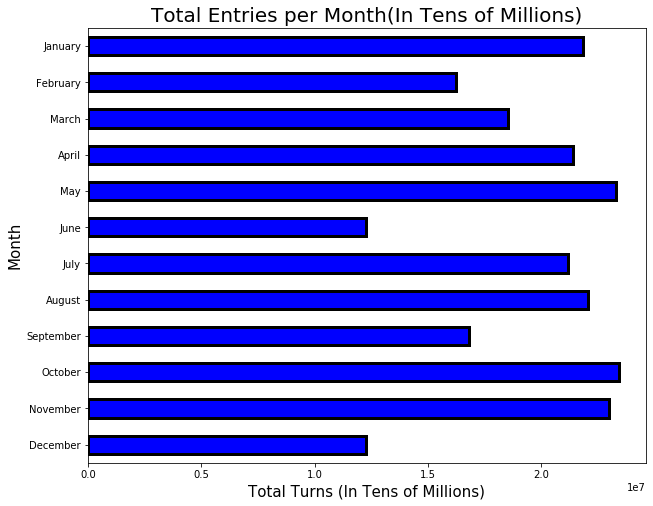

In [68]:
plt.figure(figsize=(10, 8))

df.groupby(['month'])['total_turns'].sum()[reversed(months)].plot(kind = 'barh', colors = 'blue', edgecolor='black',
                                                               linewidth='3')
plt.title('Total Entries per Month(In Tens of Millions)',fontsize = 20)
plt.xlabel('Total Turns (In Tens of Millions)', fontsize = 15)
plt.ylabel('Month',fontsize = 15)


Our inital graph shown above is to see which months generate the most turns per station. What we see is sort of what we expected, we see the lowest months being in both june and december which would make sense. June turns should be down due to the beginning of summer happening and less people possibly being around as well as December being a low month due to people taking off for the holiday break. Towards the end of year shows two of the top 3 months with the highest turns being in October and November which could indicate the right time period for a move to be made.

In [69]:
day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']

In [70]:
pd.DataFrame(df.groupby(['day'])['total_turns'].sum()).sort_values(by = 'total_turns', ascending = False)

,total_turns
day,
Wednesday,40459671
Thursday,40191474
Tuesday,39062280
Friday,38806379
Monday,36559066
Saturday,20611974
Sunday,16690967


Text(0, 0.5, 'day')

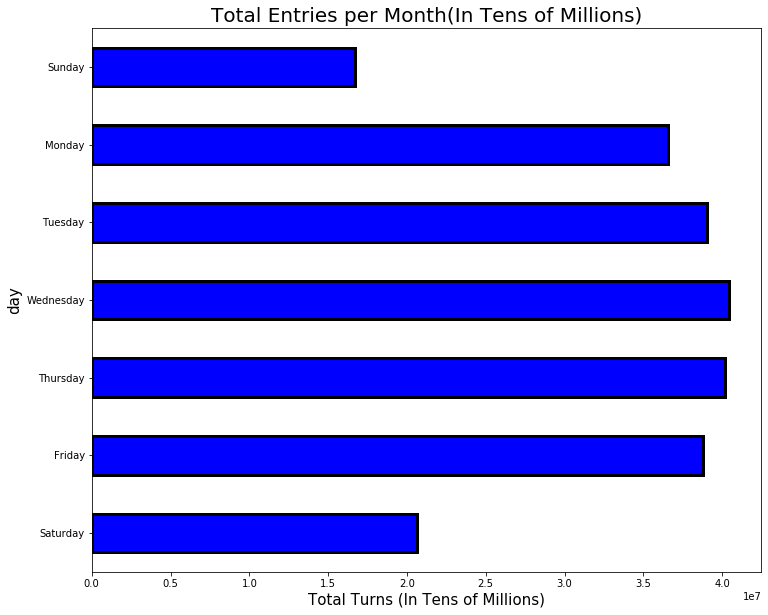

In [71]:
plt.figure(figsize=(12, 10))

df.groupby(['day'])['total_turns'].sum()[reversed(day)].plot(kind = 'barh', colors = 'blue', edgecolor='black',
                                                               linewidth='3')
plt.title('Total Entries per Month(In Tens of Millions)',fontsize = 20)
plt.xlabel('Total Turns (In Tens of Millions)', fontsize = 15)
plt.ylabel('day',fontsize = 15)

When we see the turns by day, Saturday and Sunday were expecte to see the slowest activity given that these are non-work days for most people. Interesting enough is to see how the gradual increase up to Wednesday being the peak and then a gradually decrease back down. Activity is telling as it can show people maybe with more flexible working arrangements maybe needing to come in for a day a week to meet with their perspective teams. 

In [72]:
stations_names = df['Station'].sort_values().unique()
stations_names

array(['14 ST', '23 ST', '34 ST-PENN STA', '42 ST-PORT AUTH',
       '5 AV/53 ST', '50 ST', '7 AV', '75 AV', '8 AV', 'BRIARWOOD',
       'CANAL ST', 'CHAMBERS ST', 'COURT SQ-23 ST', 'FOREST HILLS 71',
       'JFK JAMAICA CT1', 'JKSN HT-ROOSVLT', 'KEW GARDENS',
       'LEXINGTON AV/53', 'QUEENS PLAZA', 'SPRING ST', 'TIMES SQ-42 ST',
       'W 4 ST-WASH SQ', 'WORLD TRADE CTR'], dtype=object)

In [73]:
pd.DataFrame(df.groupby(['Station'])['total_turns'].sum()).sort_values(by = 'total_turns', ascending = False).head(10)

,total_turns
Station,
42 ST-PORT AUTH,41218502
34 ST-PENN STA,28065818
LEXINGTON AV/53,20514569
TIMES SQ-42 ST,18475624
W 4 ST-WASH SQ,13470280
5 AV/53 ST,12704970
JKSN HT-ROOSVLT,12200934
CHAMBERS ST,11707085
FOREST HILLS 71,10593588


''

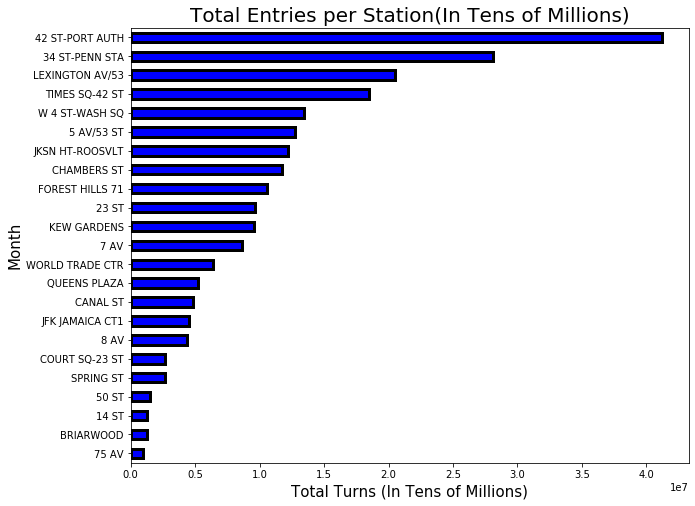

In [74]:
plt.figure(figsize=(10, 8))

df.groupby(['Station'])['total_turns'].sum().sort_values().plot(kind = 'barh', colors = 'blue', edgecolor='black',
                                                               linewidth='3')
plt.title('Total Entries per Station(In Tens of Millions)',fontsize = 20)
plt.xlabel('Total Turns (In Tens of Millions)', fontsize = 15)
plt.ylabel('Month',fontsize = 15)
;

Per what we expected, the port authority terminal station as well as the Penn Station station had the top two total turns. Beneath that, you'll notice that the next real 'tier' of stops were all basically manhattan stops, which would make sense due to majority of people working in the city. The first station on that list that isnt in manhattan is the Jackson Avenue station and something that we will want to dig in a little more below tok see the average distance of starbucks in that area. But from this graph, we will examine port authroity as a means of seeing what a high turnstile area looks like as one of our case studies.

In [75]:
pd.DataFrame(df.groupby(['Station'])['avg_distance'].mean()).sort_values(by = 'avg_distance', ascending = False).head(10)

,avg_distance
Station,
JKSN HT-ROOSVLT,0.033124
COURT SQ-23 ST,0.020154
BRIARWOOD,0.020001
JFK JAMAICA CT1,0.019900
QUEENS PLAZA,0.017267
KEW GARDENS,0.011073
75 AV,0.008150
SPRING ST,0.004726
FOREST HILLS 71,0.004540


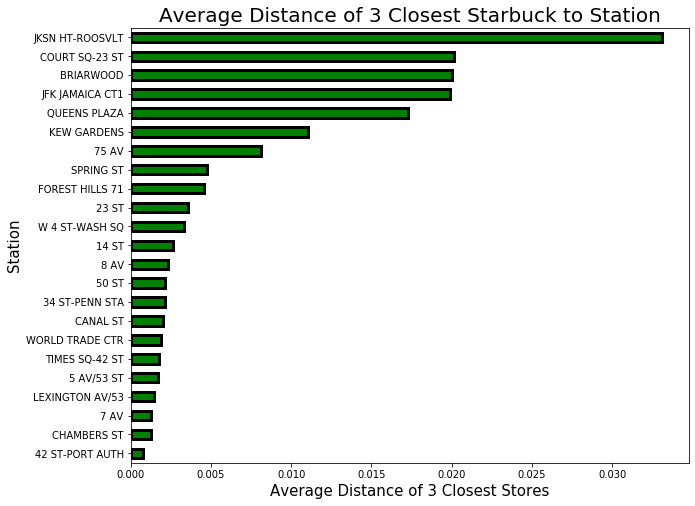

In [76]:
plt.figure(figsize=(10, 8))

df.groupby(['Station'])['avg_distance'].mean().sort_values().plot(kind = 'barh', colors = 'green', edgecolor='black',
                                                               linewidth='3')
plt.title('Average Distance of 3 Closest Starbuck to Station',fontsize = 20)
plt.xlabel('Average Distance of 3 Closest Stores', fontsize = 15)
plt.ylabel('Station',fontsize = 15);

When looking at this graph, the NYC stations should be more towards the bottom of this list as expected because of there being more stores located within manhattan and closer together. What I did not expect to see was that the station with the most turnstiles that wasnt located in manhattan, which is Jackson Hiehgts, would be at the top of this list as the the station witht the furtheset total starbucks. This was something that stood out and was the station that we needed to look into further to see if there was an upward trajectory in our foot turnstile metric created to see if there would be a growing oppertunity there.

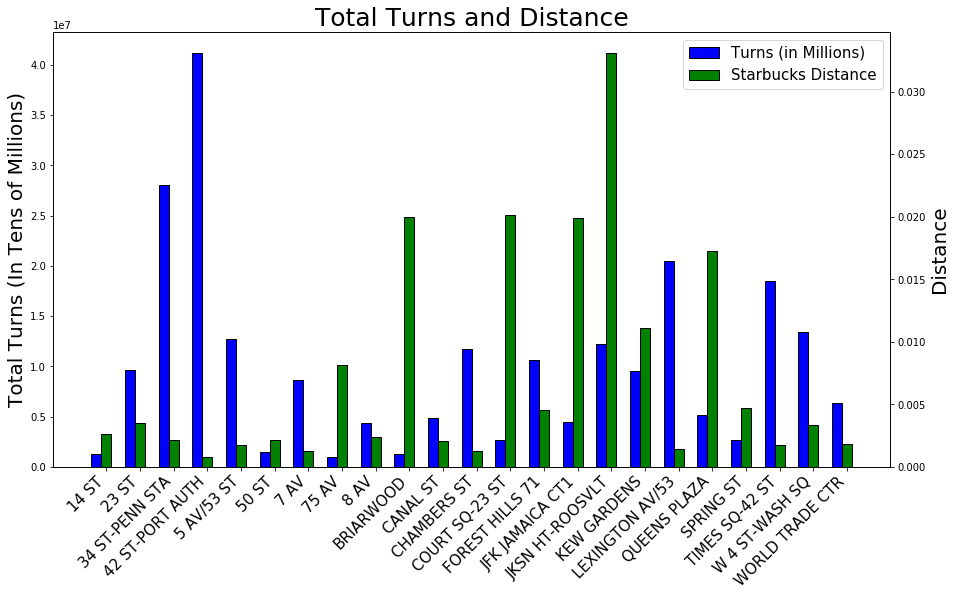

In [77]:
# Have two sets of data we want to plot
bars1 = df.groupby(['Station'])['total_turns'].sum()
bars2 = df.groupby(['Station'])['avg_distance'].mean()
barWidth = .3

# arange x values to be plotted
b1 = np.arange(len(bars1))
b2 = [x + barWidth for x in b1]
b3 = b1+b2 

#Set up Graph
fig = plt.figure(figsize = (15,8))
ax = plt.subplot(111)


# Create Total Turns bar
ax.bar(b1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Turns (in Millions)')
plt.xticks([r + barWidth for r in range(len(b3))], stations_names, rotation=45,fontsize = 15)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.yticks(fontsize = 10)
plt.ylabel('Total Turns (In Tens of Millions)', fontsize = 20)
# Create Starbucks Distance
ax2 = ax.twinx()
ax2.bar(b2, bars2, width = barWidth, color = 'green', edgecolor = 'black', capsize=7, label='Starbucks Distance')
plt.ylabel('Distance', fontsize = 20)

plt.title("Total Turns and Distance",  fontsize= 25)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0, fontsize = 15)

plt.show()


With the graph above, its just more of insurance for people to see the relation of the two prior graphs being side by side with eachother. As you see, Jackson Heights show the most activity between the turn and average distance metrics

In [78]:
fol = df.groupby('Station').mean().reset_index()
fol2 = df.groupby('Station').sum().reset_index()
fol.head()

,Station,Station_Latitude,Station_Longitude,first_closest,second_closest,third_closest,Entries,Exits,total_turns,avg_distance
0,14 ST,40.740893,-74.001690,0.001861,0.002499,0.003523,1586.097179,2408.758621,3994.855799,0.002628
1,23 ST,40.745906,-73.998041,0.003181,0.003717,0.003729,1204.652737,833.162919,2037.815655,0.003542
2,34 ST-PENN STA,40.752287,-73.993391,0.001281,0.001281,0.003779,1136.768325,1082.399700,2219.168024,0.002114
3,42 ST-PORT AUTH,40.757308,-73.989735,0.000612,0.000680,0.001043,1587.264095,1140.270447,2727.534542,0.000778
4,5 AV/53 ST,40.760167,-73.975224,0.001516,0.001719,0.001915,909.374301,1011.256085,1920.630385,0.001717


In [79]:
lat = [coors for coors in fol['Station_Latitude']]
long = [coors for coors in fol['Station_Longitude']]
coors = (pd.DataFrame({'lat': lat,'long':long}))
points = list(zip(coors['lat'], coors['long']))

In [80]:
m = folium.Map(location=[40.693943, -73.985880], default_zoom_start=10)

for i in range(0,len(fol)):
    folium.Circle(
        #set location of points
        location=[fol.iloc[i]['Station_Latitude'], fol.iloc[i]['Station_Longitude']],
        #what name of pop ups will be
        popup=fol.iloc[i]['Station'],
        # how big radius circles will be based off of turnstiles
        radius=fol2.iloc[i]['total_turns']/90000,
        color='crimson',
        fill=True,
        fill_color='crimson'
   ).add_to(m)
    folium.Marker(
        #show where to add blue marker
        location=[fol.iloc[i]['Station_Latitude'], fol.iloc[i]['Station_Longitude']],
        popup=fol.iloc[i]['Station'],
        tooltip = "Station"
   ).add_to(m)
    
m

http://web.mta.info/nyct/service/eline.htm

Built an interactive map to accurate show the stations along the E line as well as the sum of the turnstile represented by the size of the red circles at each station.

### Port Authority EDA

Per above, our first station that we would like to look into will be Port Auhtority as it has shown the highet number of turn in the area.

In [81]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,month,day,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store,Entries,Exits,total_turns,avg_distance
Date,,,,,,,,,,,,,,,,,,,,
2016-12-31,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,December,Saturday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,622,1607,2229,0.001786
2017-01-01,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Sunday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,767,1568,2335,0.001786
2017-01-02,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Monday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1192,1808,3000,0.001786
2017-01-03,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Tuesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3193,3895,7088,0.001786
2017-01-04,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Wednesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3124,4108,7232,0.001786


In [82]:
port = df[df['Station'] == '42 ST-PORT AUTH']

Text(0, 0.5, 'Month')

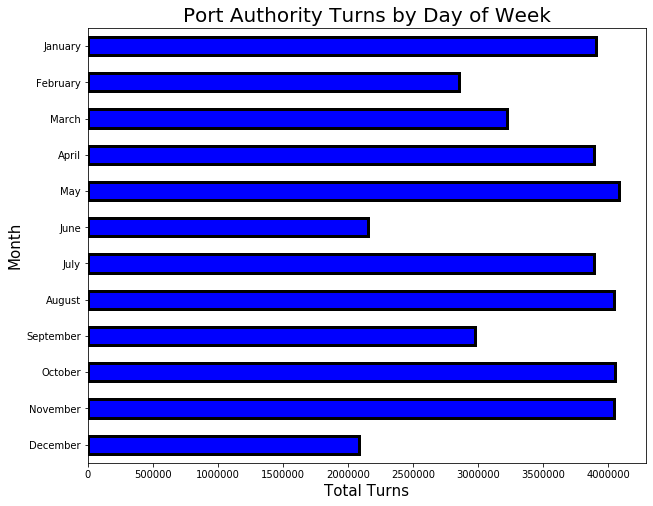

In [83]:
plt.figure(figsize=(10, 8))
port.groupby('month')['total_turns'].sum()[reversed(months)].plot(kind = 'barh', colors = 'blue', edgecolor='black',
                                                               linewidth='3')
plt.title('Port Authority Turns by Day of Week', fontsize = 20)
plt.xlabel('Total Turns', fontsize = 15)
plt.ylabel('Month', fontsize = 15)

We note that this graph greatly resembles the one shown in our prior EDA with similar months sticking out.

In [84]:
port1 = df.loc[df['Station'] == '42 ST-PORT AUTH',:].groupby('Date').sum()

In [85]:
port1.head()

,Station_Latitude,Station_Longitude,first_closest,second_closest,third_closest,Entries,Exits,total_turns,avg_distance
Date,,,,,,,,,
2016-12-31,1997.108092,-3625.497015,0.029978,0.033334,0.051087,64566,45238,109804,0.038133
2017-01-01,1997.108092,-3625.497015,0.029978,0.033334,0.051087,48202,37811,86013,0.038133
2017-01-02,1997.108092,-3625.497015,0.029978,0.033334,0.051087,53122,38180,91302,0.038133
2017-01-03,1997.108092,-3625.497015,0.029978,0.033334,0.051087,95763,64798,160561,0.038133
2017-01-04,1997.108092,-3625.497015,0.029978,0.033334,0.051087,93185,62397,155582,0.038133


(array([ 20000.,  40000.,  60000.,  80000., 100000., 120000., 140000.,
        160000., 180000.]), <a list of 9 Text yticklabel objects>)

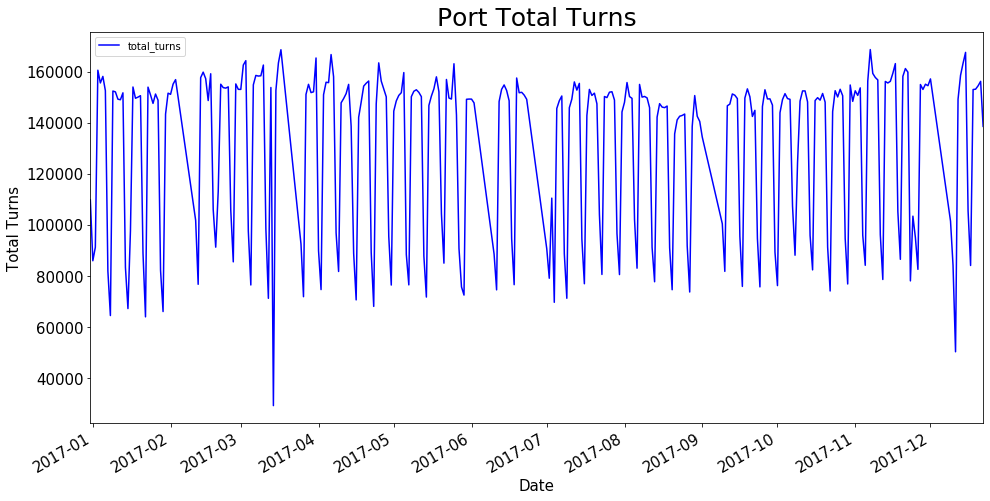

In [86]:
plt.figure(figsize=(16,8))
port1['total_turns'].plot(color = 'blue', legend = True)
plt.title('Port Total Turns', fontsize = 25)
plt.xlabel('Date',fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Total Turns',fontsize = 15)
plt.yticks(fontsize = 15)


Per this graph, Even though we arent able to see any trends within the data, we are able to notice two distinct points between March and April and then again in December till the end. When digging further into the first downward trend, we see that the cause of this first downward trend was the March 2017 North American blizzard that occured which ledour model gravely over predeicted the point. Although this never happened, the threat was there of it, which, is part of a winter life cycle in New York. Because of that, i felt that the point should remain in there if we were to expand this model outward several years. To get a better understanding of the trends, we will run a rolling over by month/ quarter graph as well as resample as shown below.

In [87]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18, rotation = 45);

Create a function that helps us plot our points more refficently

Text(0, 0.5, 'Total Average Turns')

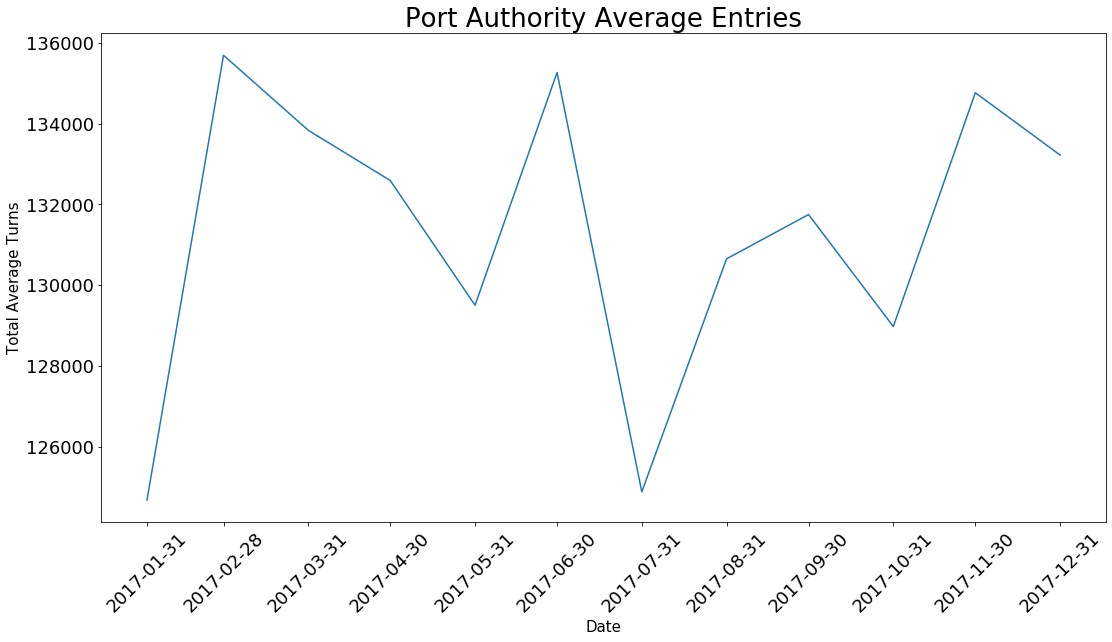

In [88]:
plot_series(port1.resample('M', closed = 'left').mean(),
            ['total_turns'],
            title = 'Port Authority Average Entries',
            steps = 1)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Total Average Turns', fontsize = 15)

Graph above shows the trends within our data in a more meaningful way. This in a way, really reflects peoples working styles with highs in the winter and fall and lows in the summer as people arent working as much then.

In [89]:
port1['rolling_month_turns'] = port1['total_turns'].rolling(30).mean()
port1['rolling_quarter_turns'] = port1['total_turns'].rolling(91).mean()

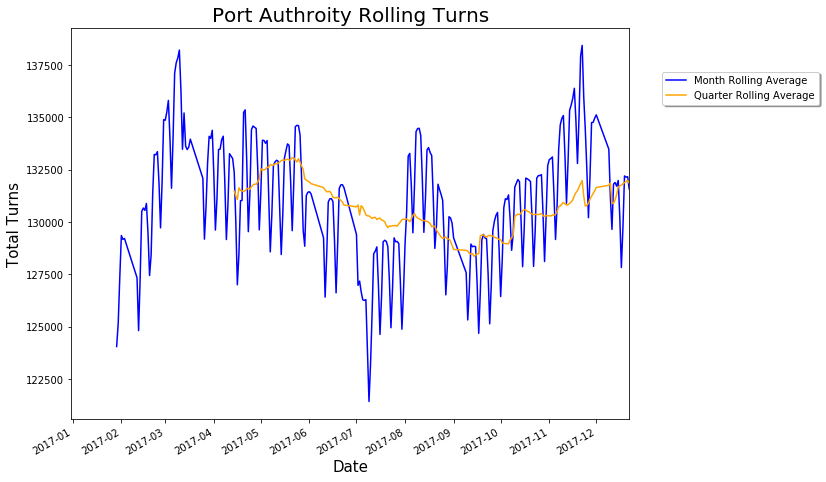

In [90]:
plt.figure(figsize = (10,8))
port1['rolling_month_turns'].plot(color = 'b', label = 'Month Rolling Average')
port1['rolling_quarter_turns'].plot(color = 'orange', label = 'Quarter Rolling Average')
plt.title('Port Authroity Rolling Turns', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Total Turns', fontsize = 15)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, .9), shadow=True, ncol=1);

What we can see here from looking at the rolling average graph is that there tends to be seasonal data as we see teh increases in the winter, decreases in the summer, and an increase happening again towards the fall.

In [91]:
port1 = df.loc[df['Station'] == '42 ST-PORT AUTH',:].groupby('Date').sum()

In [92]:
port1.shape

(315, 9)

In [93]:
port1.head()

,Station_Latitude,Station_Longitude,first_closest,second_closest,third_closest,Entries,Exits,total_turns,avg_distance
Date,,,,,,,,,
2016-12-31,1997.108092,-3625.497015,0.029978,0.033334,0.051087,64566,45238,109804,0.038133
2017-01-01,1997.108092,-3625.497015,0.029978,0.033334,0.051087,48202,37811,86013,0.038133
2017-01-02,1997.108092,-3625.497015,0.029978,0.033334,0.051087,53122,38180,91302,0.038133
2017-01-03,1997.108092,-3625.497015,0.029978,0.033334,0.051087,95763,64798,160561,0.038133
2017-01-04,1997.108092,-3625.497015,0.029978,0.033334,0.051087,93185,62397,155582,0.038133


### Jackson Heights EDA

Due to Jackson Heights having highest number of turnstiles as well as the the highest distance of Starbucks to the stations, we will look at Jackson Hieghts as a means of determining if this could be a viable station for the oppertunity to look into a starbucks.

In [94]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,month,day,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store,Entries,Exits,total_turns,avg_distance
Date,,,,,,,,,,,,,,,,,,,,
2016-12-31,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,December,Saturday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,622,1607,2229,0.001786
2017-01-01,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Sunday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,767,1568,2335,0.001786
2017-01-02,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Monday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1192,1808,3000,0.001786
2017-01-03,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Tuesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3193,3895,7088,0.001786
2017-01-04,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Wednesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3124,4108,7232,0.001786


In [95]:
jksn_ht = df[df['Station'] == 'JKSN HT-ROOSVLT']

In [96]:
pd.DataFrame(jksn_ht.groupby(['month'])['total_turns'].sum()[months]).sort_values(by= 'total_turns', ascending = False)


,total_turns
month,
January,1286655
May,1215159
November,1209517
April,1200180
October,1160819
August,1095442
July,1045514
March,982833
February,909570


Text(0, 0.5, 'Month')

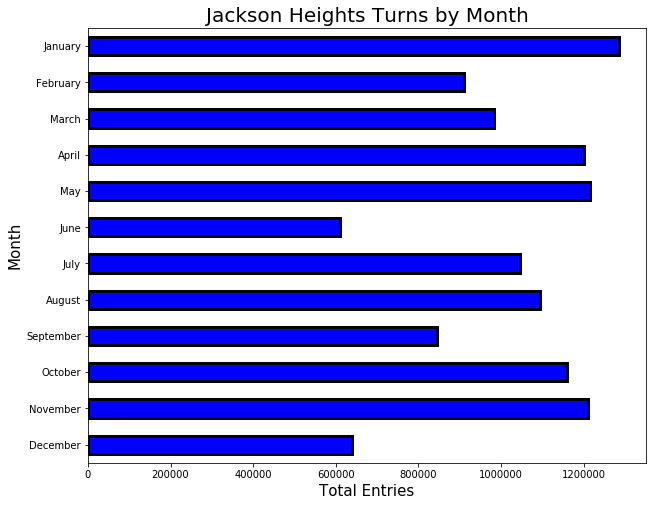

In [97]:
plt.figure(figsize=(10, 8))
jksn_ht.groupby('month')['total_turns'].sum()[reversed(months)].plot(kind = 'barh', colors = 'blue', edgecolor='black',
                                                               linewidth='3')
plt.title('Jackson Heights Turns by Month', fontsize = 20)
plt.xlabel('Total Entries', fontsize = 15)
plt.ylabel('Month', fontsize = 15)

In [98]:
jksn_ht1 = df.loc[df['Station'] == 'JKSN HT-ROOSVLT' ,:].groupby('Date').sum()

In [99]:
jksn_ht1.head()

,Station_Latitude,Station_Longitude,first_closest,second_closest,third_closest,Entries,Exits,total_turns,avg_distance
Date,,,,,,,,,
2016-12-31,611.19966,-1108.37007,0.451082,0.501957,0.537558,19529,13157,32686,0.496866
2017-01-01,611.19966,-1108.37007,0.451082,0.501957,0.537558,13716,10923,24639,0.496866
2017-01-02,611.19966,-1108.37007,0.451082,0.501957,0.537558,17501,12802,30303,0.496866
2017-01-03,611.19966,-1108.37007,0.451082,0.501957,0.537558,28551,19540,48091,0.496866
2017-01-04,611.19966,-1108.37007,0.451082,0.501957,0.537558,30522,20932,51454,0.496866


Text(0.5, 0, 'Total Turns')

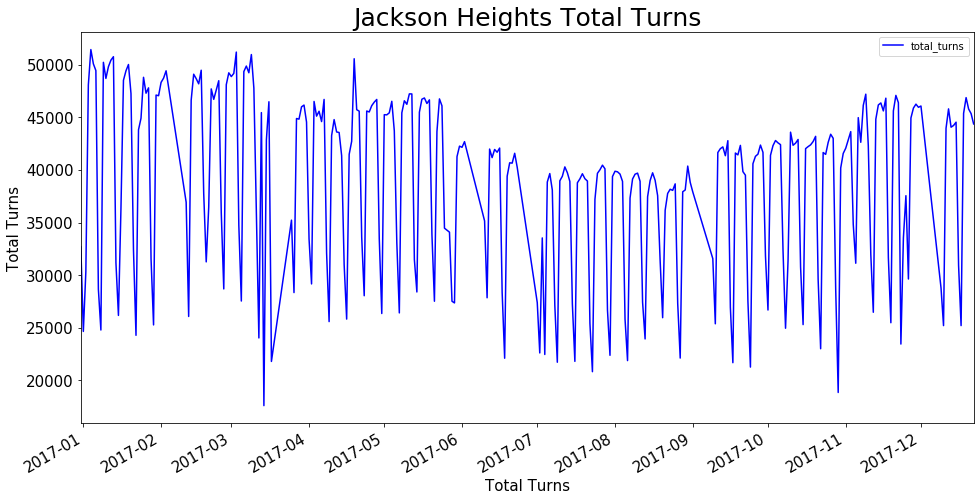

In [100]:
plt.figure(figsize=(16,8))
jksn_ht1['total_turns'].plot(color = 'blue', legend = True)
plt.title('Jackson Heights Total Turns', fontsize = 25)
plt.xlabel('Date',fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Total Turns',fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Total Turns',fontsize = 15)

Per this graph, we are unable to determine much, we will resmaple to get a better understanding of trends in the data. Like our Port Authority point where it was more appartents due to the increase number of people who didnt travel into the city the day of the blizzard warning, we do see a little dip in our data in March that represents the blizzard threat that happened.

Text(0, 0.5, 'Total Average Turns')

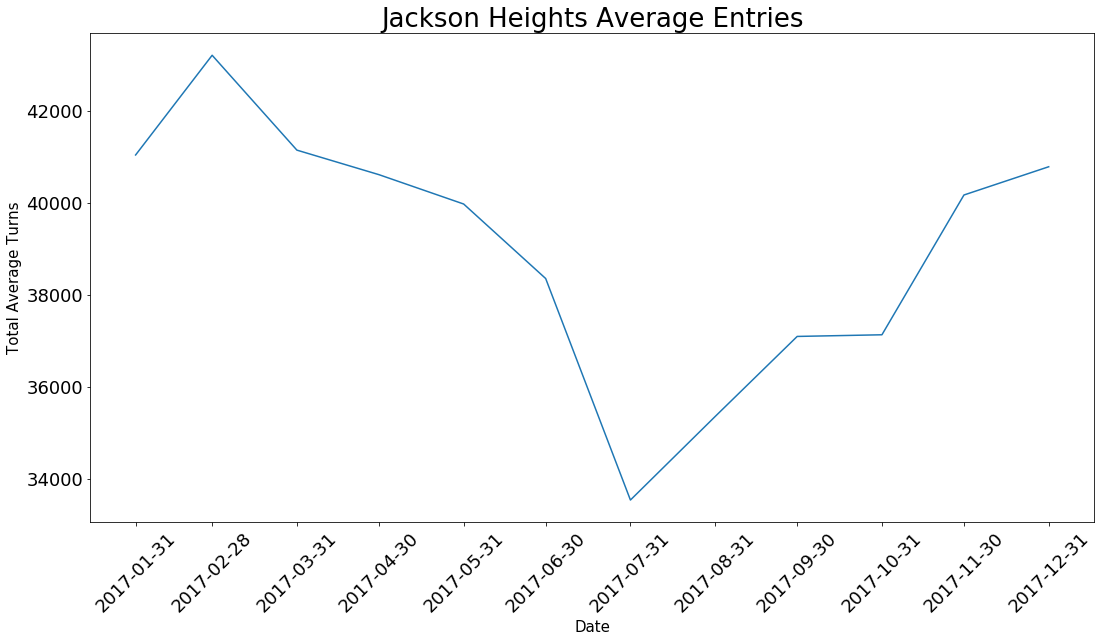

In [101]:
plot_series(jksn_ht1.resample('M', closed = 'left').mean(),
            ['total_turns'],
            title = 'Jackson Heights Average Entries',
            steps = 1)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Total Average Turns', fontsize = 15)

Above shows the Jackson Heights Trends which show similar results to that of Port Authority where we have highs in the winter and fall and lows in the summer.

In [102]:
jksn_ht1['rolling_month_turns'] = jksn_ht1['total_turns'].rolling(30).mean()
jksn_ht1['rolling_quarter_turns'] = jksn_ht1['total_turns'].rolling(91).mean()

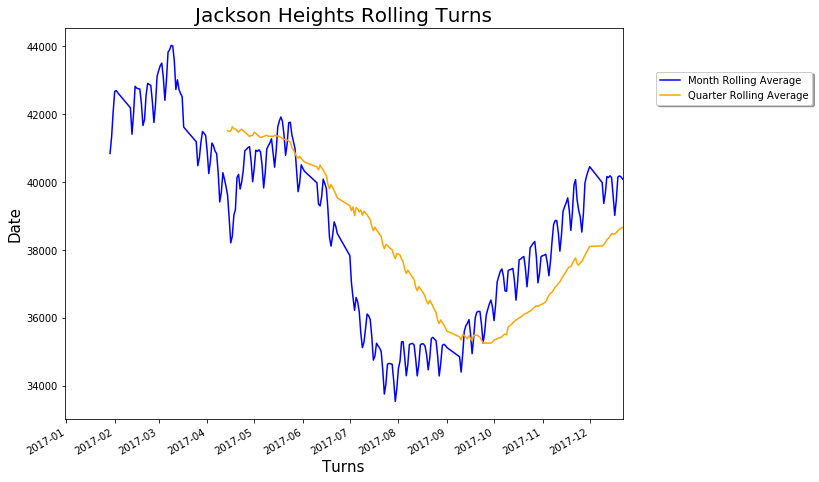

In [103]:
plt.figure(figsize = (10,8))
jksn_ht1['rolling_month_turns'].plot(color = 'b', label = 'Month Rolling Average')
jksn_ht1['rolling_quarter_turns'].plot(color = 'orange', label = 'Quarter Rolling Average')
plt.title('Jackson Heights Rolling Turns', fontsize = 20)
plt.xlabel('Turns', fontsize = 15)
plt.ylabel('Date', fontsize = 15)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, .9), shadow=True, ncol=1);

With this grapg we can clearly see that there was a downward trend towards the midelle of the year which can be a cause of summer coming around and less people possibly looking to take the subway to travel. As the summer months comes to an end however, we see that the numbers start to increase again which is really our first sign of sesaonality.

## Modeling

For our modeling stage, we are going to look to fit an ARIMA as well as an SARIMAX model to judge on at both Port Authority adn Jackson Heights.

In [104]:
def baseline_model(df):
    dummy = pd.DataFrame({0:df['total_turns'], 1: df['total_turns'].mean()})
    return print(f' Our baseline model RMSE is {np.sqrt(mean_squared_error(dummy[0], dummy[1]))}')

Created a function to give us a Baseline RMSE for both stations

### Port Authority Modeling

__Baseline Model__

In [105]:
baseline_model(port1)

 Our baseline model RMSE is 31979.67739142347


By establishing our baseline, we are looking to build models that will score better than an RMSE of 31,980

One of the first things we wanted to look at was to see if there was stationarity in our data. To do this, we will want to perform the Augmented Dickey-Fuller Test which is a hypthesis test that will be run and what we would like to see is a small P-value on our y-variable so we can reject the null hypothesis and state that the data is stationary. We determine that a value of .05 and lower will reject the null hypthesis 

In [106]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [107]:
interpret_dftest(adfuller(port1['total_turns']))

Test Statistic   -4.673698
p-value           0.000094
dtype: float64

As we can see, our P-Value is below our threshold of .05 which means we are able to determine that our data is in fact stationary and will not have to be differed to be performing models.

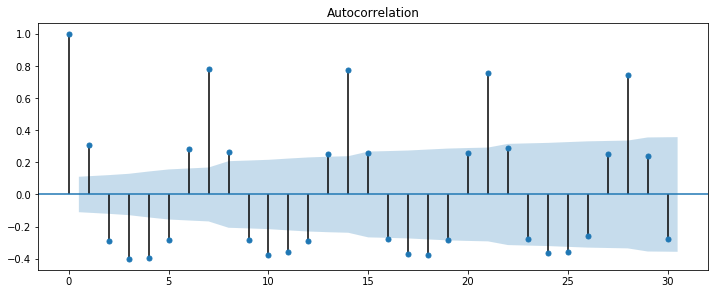

In [108]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(port1['total_turns'], lags=30, ax=ax1);

When also looking at this graph, points that are within the blue curve represent 95% cofidence interval for these correlations. Points that are outside this curve mean that there is a significan correlation betwen our turns and previous lags.  As you can see there is seasonality that occurs every 7 days within our data which does make it had to determine a value that we can have. Because of this, we will look at our PACF to see if we determine one that way.




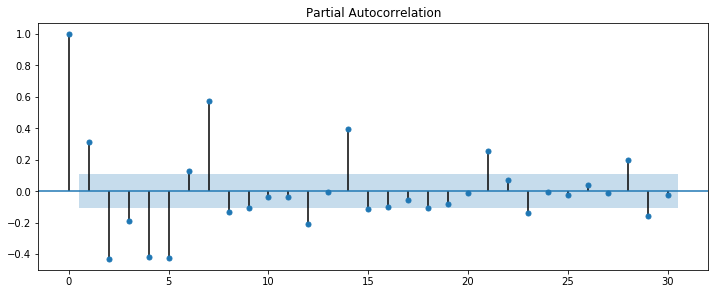

In [109]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = plot_pacf(port1['total_turns'], lags=30, ax=ax1);

Due to the seaonality compnent of the PACF shown every 7 days, we are unable to interpret a P value from our graph as there is a clear spike within our data. Because of this, we will have to mannually perform a grid search over the data to determine our optimal P value.

#### Port ARIMA

In [110]:
port_train, port_test = train_test_split(port1['total_turns'], test_size = 0.25, shuffle = False)

In [111]:
port_test.index[67]

Timestamp('2017-12-11 00:00:00')

When we looked at our residual, we noted that this point was an outlier because of the port Authority bomb being considered an abnormal activity. As such, we will drop this point from our dataset.

In [112]:
port_test.drop(port_test.index[67], axis = 0, inplace = True)

In [113]:
len(port_test)

78

In [114]:
def train_test_plot(train, test):
    plt.figure(figsize=(16, 8))
    plt.plot(train, c='blue')
    plt.plot(test, c='orange')

This will be a funcation that we will be able to use to plot our train and test data

(array([ 20000.,  40000.,  60000.,  80000., 100000., 120000., 140000.,
        160000., 180000.]), <a list of 9 Text yticklabel objects>)

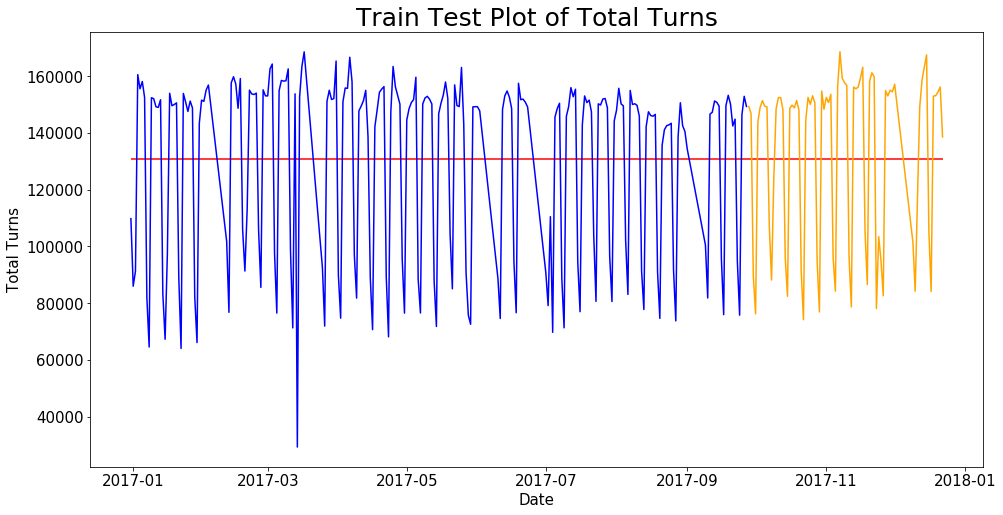

In [115]:
train_test_plot(port_train, port_test)
plt.title('Train Test Plot of Total Turns', fontsize = 25)
plt.hlines(y = port1['total_turns'].mean(), xmin=port1.index[0], xmax = port1.index[-1], color = 'red')
plt.xlabel ('Date', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel ('Total Turns', fontsize = 15)
plt.yticks(fontsize = 15)

Plot our train test split to see the spread of data and the average total turnstiles at that station. we note the change from our prior plot as we dropped the 12/11 point from our dataset.

In [116]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range (0,7):
    for q in range (0,7):
        
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 0, q) model.
            print(f'Attempting to fit ARIMA({p}, 0, {q}) Model')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = port_train.astype(float).dropna(),  ##endog = y - variable
                         order = (p, 0, q))
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},0,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},0,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0, 0, 0) Model
The AIC for ARIMA(0,0,0) is: 5572.484065568603
Attempting to fit ARIMA(0, 0, 1) Model
The AIC for ARIMA(0,0,1) is: 5529.778056775479
Attempting to fit ARIMA(0, 0, 2) Model
The AIC for ARIMA(0,0,2) is: 5515.090096420732
Attempting to fit ARIMA(0, 0, 3) Model
The AIC for ARIMA(0,0,3) is: 5481.78144855227
Attempting to fit ARIMA(0, 0, 4) Model
Attempting to fit ARIMA(0, 0, 5) Model
Attempting to fit ARIMA(0, 0, 6) Model
Attempting to fit ARIMA(1, 0, 0) Model
The AIC for ARIMA(1,0,0) is: 5552.530461394445
Attempting to fit ARIMA(1, 0, 1) Model
The AIC for ARIMA(1,0,1) is: 5529.984185711405
Attempting to fit ARIMA(1, 0, 2) Model
The AIC for ARIMA(1,0,2) is: 5495.021126689071
Attempting to fit ARIMA(1, 0, 3) Model
The AIC for ARIMA(1,0,3) is: 5483.764526424297
Attempting to fit ARIMA(1, 0, 4) Model
The AIC for ARIMA(1,0,4) is: 5480.487696418872
Attempting to fit ARIMA(1, 0, 5) Model
The AIC for ARIMA(1,0,5) is: 5467.816631819332
Attempting to fit ARIMA(

In [117]:
best_arima = ARIMA(endog = port_train.astype(float),
              order = (6, 0, 6))
best_arima_fit = best_arima.fit()

In [118]:
port_preds_arima = best_arima_fit.forecast(steps = len(port_test))[0]

In [119]:
port_arima_error = np.sqrt(mean_squared_error(port_test, port_preds_arima))
print(f'RMSE: {round(port_arima_error, 2)}')

RMSE: 15420.69


#### Port Sarmimax

With our SARIMAX model, we note that we will not be adding a egogin

In [120]:
# Starting RMSE, p, and q.
final_rmse = 99 * (10 ** 16)
best_P = 0
best_Q = 0
# Use nested for loop to iterate over values of P and Q.
for P in range (7):
    for Q in range (7):



    # Insert try and except statements.
        try:

            # Fitting an SARIMA (P, 0, Q, 12) model.
            print(f'Attempting to fit SARIMA({P}, 0, {Q}, 7) Model')

            # Instantiate SARIMA model.
            best_sarimax = SARIMAX(endog = port_train,
                       order = (6, 0, 6),
                       seasonal_order = (P,0,Q, 7))

            model = best_sarimax.fit()
            sarimax_pred = model.forecast(steps = len(port_test))
            # Print out RMSE for SARIMA(P, D, Q,12) model.
            # Evaluate predictions.
            print(f'The RMSE for (6, 0, 6)x({P},0,{Q},12) is: {np.sqrt(mean_squared_error(port_test, sarimax_pred))}')
            # Is my current model's RMSE better than our best_RMSE?

            if np.sqrt(mean_squared_error(port_test, sarimax_pred)) < final_rmse:
                # If so, let's overwrite best_RMSE best_p, and best_q.
                final_rmse = np.sqrt(mean_squared_error(port_test, sarimax_pred))
                best_P = P
                best_Q = Q
        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes RMSE on the training data is the SARIM({best_P},0,{best_Q}, 7).')
print(f'This model has an RMSE of {final_rmse}.')

Attempting to fit SARIMA(0, 0, 0, 7) Model
The RMSE for (6, 0, 6)x(0,0,0,12) is: 17193.527741883594
Attempting to fit SARIMA(0, 0, 1, 7) Model
The RMSE for (6, 0, 6)x(0,0,1,12) is: 16945.48979637168
Attempting to fit SARIMA(0, 0, 2, 7) Model
The RMSE for (6, 0, 6)x(0,0,2,12) is: 29177.61998483195
Attempting to fit SARIMA(0, 0, 3, 7) Model
The RMSE for (6, 0, 6)x(0,0,3,12) is: 28486.48819005235
Attempting to fit SARIMA(0, 0, 4, 7) Model
The RMSE for (6, 0, 6)x(0,0,4,12) is: 27631.3524557755
Attempting to fit SARIMA(0, 0, 5, 7) Model
The RMSE for (6, 0, 6)x(0,0,5,12) is: 27402.71790671975
Attempting to fit SARIMA(0, 0, 6, 7) Model
The RMSE for (6, 0, 6)x(0,0,6,12) is: 25702.361661315255
Attempting to fit SARIMA(1, 0, 0, 7) Model
The RMSE for (6, 0, 6)x(1,0,0,12) is: 17719.60303939802
Attempting to fit SARIMA(1, 0, 1, 7) Model
The RMSE for (6, 0, 6)x(1,0,1,12) is: 15362.620480672884
Attempting to fit SARIMA(1, 0, 2, 7) Model
The RMSE for (6, 0, 6)x(1,0,2,12) is: 15818.766678600234
Attempt

In [121]:
best_sarimax = SARIMAX(endog = port_train,
                       order = (6, 0, 6),
                       seasonal_order = (1,0,1, 7))

best_sarimax_fit = best_sarimax.fit()

port_sarimax_pred = best_sarimax_fit.predict(start = len(port_train),
                            end = len(port_train) + len(port_test) -1,
                            dynamic = True)

In [122]:
len(port_sarimax_pred)

78

ensure that predicitons match length of test after dropping point

In [123]:
port_sarimax_error = np.sqrt(mean_squared_error(port_test, port_sarimax_pred))
print(f'RMSE: {round(port_sarimax_error, 2)}')

RMSE: 15362.62


In [124]:
port_sarimax_pred_forcasting = best_sarimax_fit.predict(start = len(port_train),
                            end = len(port_train) + 150,
                            dynamic = True)

the residual plots that we are making above are points that extend past our test set that we are able to see to make future predictions into 2018

### Jackson Heights Modeling

In [125]:
baseline_model(jksn_ht1)

 Our baseline model RMSE is 8230.189752621303


for our Jackson Heights model, we are looking to beat an RMSE score of 8,230

One of the first things we wanted to look at was to see if there was stationarity in our data. To do this, we will want to perform the Augmented Dickey-Fuller Test which is a hypthesis test that will be run and what we would like to see is a small P-value on our y-variable so we can reject the null hypothesis and state that the data is stationary. We determine that a value of .05 and lower will reject the null hypthesis 

In [126]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [127]:
interpret_dftest(adfuller(jksn_ht1['total_turns']))

Test Statistic   -1.888183
p-value           0.337640
dtype: float64

As we see here with our test, our p-Value is above the .05 mark which means our data is not staitonary, as a result, we will have to diff our data once to see if we can obtain stationarity

In [128]:
jksn_ht1['diff_1'] = jksn_ht1['total_turns'].diff(1)

In [129]:
interpret_dftest(adfuller(jksn_ht1['diff_1'].dropna()))

Test Statistic   -1.031672e+01
p-value           3.083631e-18
dtype: float64

After the diff, we can see our P-Value is below our threshold of .05. When we now run both our ARIMA and SARIMA model, we will input a D value of 1

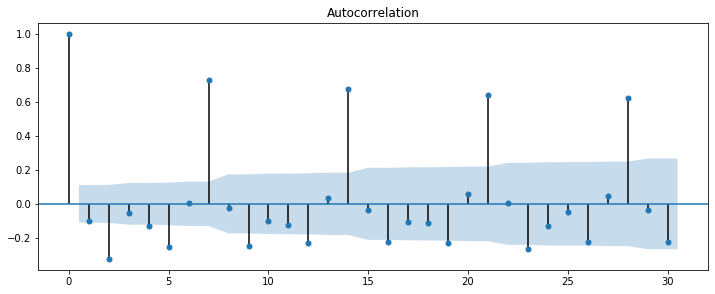

In [130]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(jksn_ht1['diff_1'].dropna(), lags=30, ax=ax1);

Similarly to what we saw in the ACF of Port Authority, we can tell that thre is seasonality within our data and that we will run again both an ARIMA and a SARIMA model with the expectation being that we should see a better score running our SARIMA model.


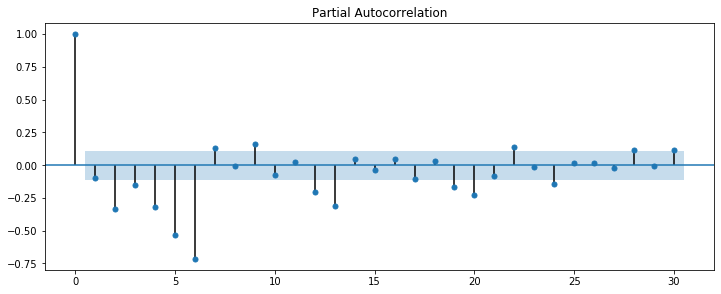

In [131]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = plot_pacf(jksn_ht1['diff_1'].dropna(), lags=30, ax=ax1);

Due to the seaonality compnent of the PACF shown every 7 days, we are unable to interpret a P value from our graph as there is a clear spike within our data. Because of this, we will have to mannually perform a grid search over the data to determine our optimal P value.

#### Jackson Heights ARIMA Model

In [132]:
jack_train, jack_test = train_test_split(jksn_ht1['total_turns'], test_size = 0.25, shuffle = False)

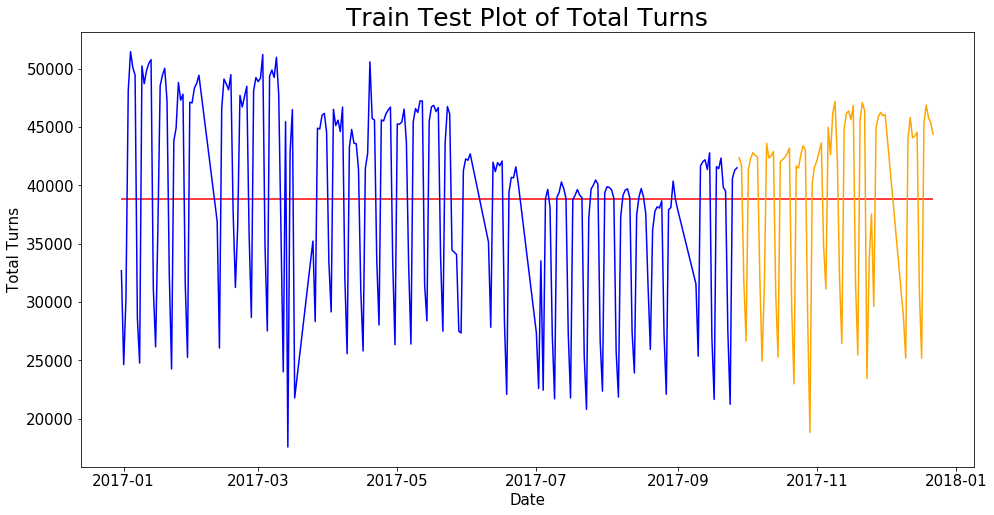

In [133]:
train_test_plot(jack_train, jack_test)
plt.title('Train Test Plot of Total Turns', fontsize = 25)
plt.xlabel ('Date', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel ('Total Turns', fontsize = 15)
plt.yticks(fontsize = 15)
plt.hlines(y = jksn_ht1['total_turns'].mean(), xmin=jksn_ht1.index[0], xmax = jksn_ht1.index[-1], color = 'red')


In [134]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range (0,7):
    for q in range (0,7):
        
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 0, q) model.
            print(f'Attempting to fit ARIMA({p}, 1, {q}) Model')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = jack_train.astype(float).dropna(),  ##endog = y - variable
                         order = (p, 1, q))
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0, 1, 0) Model
The AIC for ARIMA(0,1,0) is: 4944.870678490674
Attempting to fit ARIMA(0, 1, 1) Model
The AIC for ARIMA(0,1,1) is: 4884.40213783601
Attempting to fit ARIMA(0, 1, 2) Model
The AIC for ARIMA(0,1,2) is: 4841.275847268687
Attempting to fit ARIMA(0, 1, 3) Model
The AIC for ARIMA(0,1,3) is: 4837.716844191654
Attempting to fit ARIMA(0, 1, 4) Model
Attempting to fit ARIMA(0, 1, 5) Model
Attempting to fit ARIMA(0, 1, 6) Model
Attempting to fit ARIMA(1, 1, 0) Model
The AIC for ARIMA(1,1,0) is: 4943.860510905438
Attempting to fit ARIMA(1, 1, 1) Model
The AIC for ARIMA(1,1,1) is: 4859.077781456956
Attempting to fit ARIMA(1, 1, 2) Model
The AIC for ARIMA(1,1,2) is: 4838.520575992016
Attempting to fit ARIMA(1, 1, 3) Model
The AIC for ARIMA(1,1,3) is: 4838.340949053623
Attempting to fit ARIMA(1, 1, 4) Model
The AIC for ARIMA(1,1,4) is: 4828.003399196424
Attempting to fit ARIMA(1, 1, 5) Model
The AIC for ARIMA(1,1,5) is: 4821.644448546362
Attempting to fit ARIMA(

In [135]:
best_arima_jack = ARIMA(endog = jack_train.astype(float),
              order = (6, 1, 4))
best_arima_fit_jack = best_arima_jack.fit()

In [136]:
jack_preds = best_arima_fit_jack.predict(start = len(jack_train),
                            end = len(jack_train) + len(jack_test) - 1,
                            dynamic = True)

In [137]:
jack_arima_error = np.sqrt(mean_squared_error(jack_test, jack_preds ))
print(f'RMSE: {round(jack_arima_error, 2)}')

RMSE: 40156.61


#### Jackson Heights Sarmimax Model

With our SARIMAX model, we note that we will not be adding an exogenous variable within our model as when we did, the model was not being optimized. we will add the seasonal component as 7 as our data is daily as well as the 1 for our D as we need to difference once to get our data to be stationary.

In [138]:
# Starting RMSE, P, and Q.
final_rmse = 99 * (10 ** 16)
best_P = 0
best_Q = 0
# Use nested for loop to iterate over values of P and Q.
for P in range (7):
    for Q in range (7):



    # Insert try and except statements.
        try:

            # Fitting an SARIMA (P, 1, Q, 7) model.
            print(f'Attempting to fit SARIMA({P}, 1, {Q}, 7) Model')

            # Instantiate SARIMA model.
            best_sarimax = SARIMAX(endog = jack_train,
                       order = (6, 1, 4),
                       seasonal_order = (P,1,Q, 7))

            model = best_sarimax.fit()
            sarimax_pred = model.forecast(steps = len(jack_test))
            # Print out RMSE for SARIMA(P, 1, Q,7) model.
            # Evaluate predictions.
            print(f'The RMSE for (6, 1, 4)x({P},1,{Q},7) is: {np.sqrt(mean_squared_error(jack_test, sarimax_pred))}')
            # Is my current model's RMSE better than our best_RMSE?

            if np.sqrt(mean_squared_error(jack_test, sarimax_pred)) < final_rmse:
                # If so, let's overwrite best_RMSE best_P, and best_Q.
                final_rmse = np.sqrt(mean_squared_error(jack_test, sarimax_pred))
                best_P = P
                best_Q = Q
        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes RMSE on the training data is the SARIMA({best_P},1,{best_Q}, 7).')
print(f'This model has an RMSE of {final_rmse}.')

Attempting to fit SARIMA(0, 1, 0, 7) Model
The RMSE for (6, 1, 4)x(0,1,0,7) is: 4969.241351360051
Attempting to fit SARIMA(0, 1, 1, 7) Model
The RMSE for (6, 1, 4)x(0,1,1,7) is: 4255.193065572009
Attempting to fit SARIMA(0, 1, 2, 7) Model
The RMSE for (6, 1, 4)x(0,1,2,7) is: 3511.3445381946935
Attempting to fit SARIMA(0, 1, 3, 7) Model
The RMSE for (6, 1, 4)x(0,1,3,7) is: 3455.7000779878717
Attempting to fit SARIMA(0, 1, 4, 7) Model
The RMSE for (6, 1, 4)x(0,1,4,7) is: 3467.221029957029
Attempting to fit SARIMA(0, 1, 5, 7) Model
The RMSE for (6, 1, 4)x(0,1,5,7) is: 3560.7489073386964
Attempting to fit SARIMA(0, 1, 6, 7) Model
The RMSE for (6, 1, 4)x(0,1,6,7) is: 3522.0337633403074
Attempting to fit SARIMA(1, 1, 0, 7) Model
The RMSE for (6, 1, 4)x(1,1,0,7) is: 4289.420805680089
Attempting to fit SARIMA(1, 1, 1, 7) Model
The RMSE for (6, 1, 4)x(1,1,1,7) is: 3477.6688443690264
Attempting to fit SARIMA(1, 1, 2, 7) Model
The RMSE for (6, 1, 4)x(1,1,2,7) is: 3518.149216884044
Attempting to f

In [139]:
best_sarimax_jack = SARIMAX(endog = jack_train,
                       order = (6, 1, 4),
                       seasonal_order = (3,1,2, 7))

best_sarimax_jack_fit = best_sarimax_jack.fit()
jack_sarimax_pred = best_sarimax_jack_fit.predict(start = len(jack_train),
                            end = len(jack_train) + len(jack_test) - 1,
                            dynamic = True)

In [140]:
jack_sarimax_error = np.sqrt(mean_squared_error(jack_test, jack_sarimax_pred))
print(f'RMSE: {round(jack_sarimax_error, 2)}')

RMSE: 3451.22


In [141]:
jack_sarimax_pred_forcasting = best_sarimax_jack_fit.predict(start = len(jack_train),
                            end = len(jack_train) + 150,
                            dynamic = True)

## Model Selection

For Model Selections, we will want to take hte lower RMSE scores of each stations models

### Port Model Selection

In [142]:
port_score_df = pd.DataFrame({'Model':['ARIMA (6, 0, 6)','SARIMA (6, 0, 6) x (1,0,1, 7)'], 'RMSE':[round(port_arima_error, 2),round(port_sarimax_error, 2)]})

In [143]:
port_score_df

,Model,RMSE
0,"ARIMA (6, 0, 6)",15420.69
1,"SARIMA (6, 0, 6) x (1,0,1, 7)",15362.62


Out of both our models that were provided, we deemed that the best model to run in this situation would be our SARIMAX model with the lower of the two RMSE scores of 15,362.62. With this model, it was able to model the seasonality component we added into it. 

### Jackson Heights Model Selection

In [144]:
jack_score_df = pd.DataFrame({'Model':['ARIMA (6, 1, 4)','SARIMA (6, 1, 4) x (3,1,2, 7)'], 'RMSE':[round(jack_arima_error, 2),round(jack_sarimax_error, 2)]})

In [145]:
jack_score_df

,Model,RMSE
0,"ARIMA (6, 1, 4)",40156.61
1,"SARIMA (6, 1, 4) x (3,1,2, 7)",3451.22


When looking at our model for Jackson Heights, we can see a clearer differnce in that the SARIMA model scored better then our ARIMA. Although our scores may look better and that we are having a smaller RMSE, this is only because there isnt as much activity happening at the Jackson Heights Station. For the purpose of selecting a model here, SARIMA will be our choice.

## Model Evaluation

In evalution of our time series model, we will want to focus in on the plotting of our residuals as well as plotting our forecast to see if the model is correctly predicting the trends.


### Port Authority

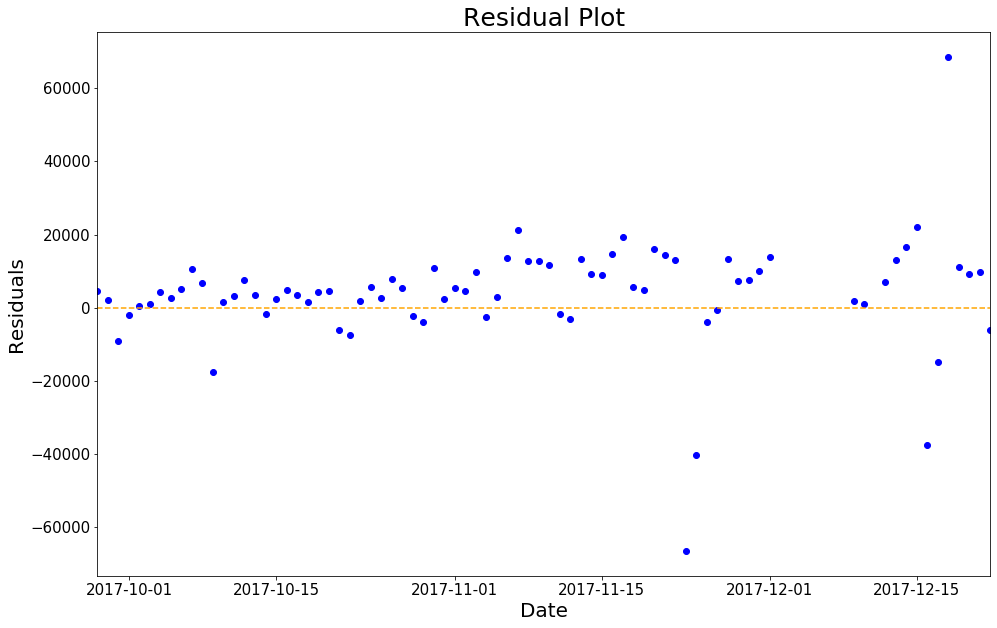

In [146]:
# Set figure size.
plt.figure(figsize=(16,10))

# Calculate residuals.
port_resids = port_test.values - port_sarimax_pred.values

# Generate scatterplot of residuals.
plt.scatter(port_test.index, port_resids, c ='blue')

# Plot baseline at y=0.
plt.hlines(y = 0,
           color = 'orange',
           xmin = port_test.index.min(),
           xmax = port_test.index.max(),
           linestyles = '--')

# Set labels and axes.
plt.title('Residual Plot', fontsize= 25)
plt.xlabel('Date', fontsize = 20)
plt.xticks(fontsize=15)
plt.xlim(port_test.index.min(), port_test.index.max())
plt.yticks(fontsize=15)
plt.ylabel('Residuals', fontsize = 20);

When evaluating the residuals plot, we notice that there are a few outliers in which the data is being skewed. The first of the two point located between 11-15 and 12-01 that are below -40,000, which means that our model is overpredicting the actual amounts by ~ -40,000 turns, are because of the thanksgiving holiday in which people arent as frequently coming to the city which our model wouldnt be able to predict. The point to the right of that which is off an estimated ~-100,000 is because on December 11th, 2017. There was a bomb threat at the port authority station which would lead to no one being able go through that subway stop. Due to the port authority threat being an abnormal activity. We can say that it would be safe to drop the point as this is something that we would not expect to happen in real life. When researching December 2017 after that day,I couldnt find an exact answer to why the model under predicted that day and why there were +60,000 compared to the prediction. I believe it could be a cause of either 1) The people started going back through port authority as a sign of strength to show that they will still go to the subway or 2) an emergency weather situation. Whichever it may be, there is no exact reason for that situation. 

(array([0.e+00, 1.e-05, 2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05]),
 <a list of 7 Text yticklabel objects>)

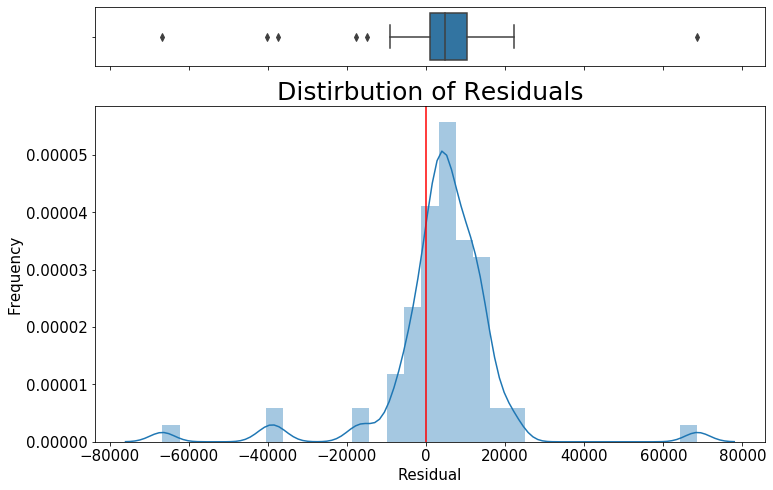

In [147]:

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2,figsize = (12,8), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(port_resids, ax=ax_box)
sns.distplot(port_resids, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.axvline(x = 0, c = 'red')
plt.title('Distirbution of Residuals', fontsize = 25)
plt.xlabel('Residual',fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.yticks(fontsize = 15)


As we can see from a dsitribution of our residuals, we can see that there is a few points that are ourside of the normal distribution due to holidays that occur every year such as the two thanksgiving holiday days people normally get off. For the most part, there is however a normal distribution that is happening within this graph

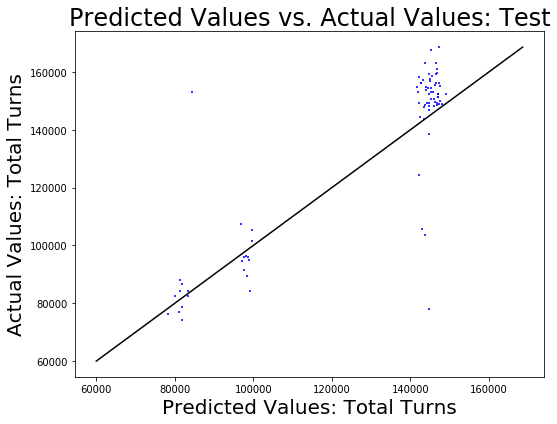

In [149]:
# Plot the Predict Test vs actual model
plt.figure(figsize=(8,6))

plt.scatter(port_sarimax_pred, port_test, s=5, color='blue',marker = '+', alpha = 0.8)

plt.plot([60000, np.max(port_test)],
         [60000, np.max(port_test)],
         color = 'black')
plt.xlabel("Predicted Values: Total Turns", fontsize = 20)
plt.ylabel("Actual Values: Total Turns", fontsize = 20)
plt.title('Predicted Values vs. Actual Values: Test', fontsize = 24)
plt.tight_layout();

The plot above also shows how our predicted faired against the actual values. What we want to see here is that points are relatively close to our line of best fit that is shown within our model. Our model tends to underpredict the higher values as shown which can be a cause of the holiday months pulling the line down to accomodate the over predictions happening there.

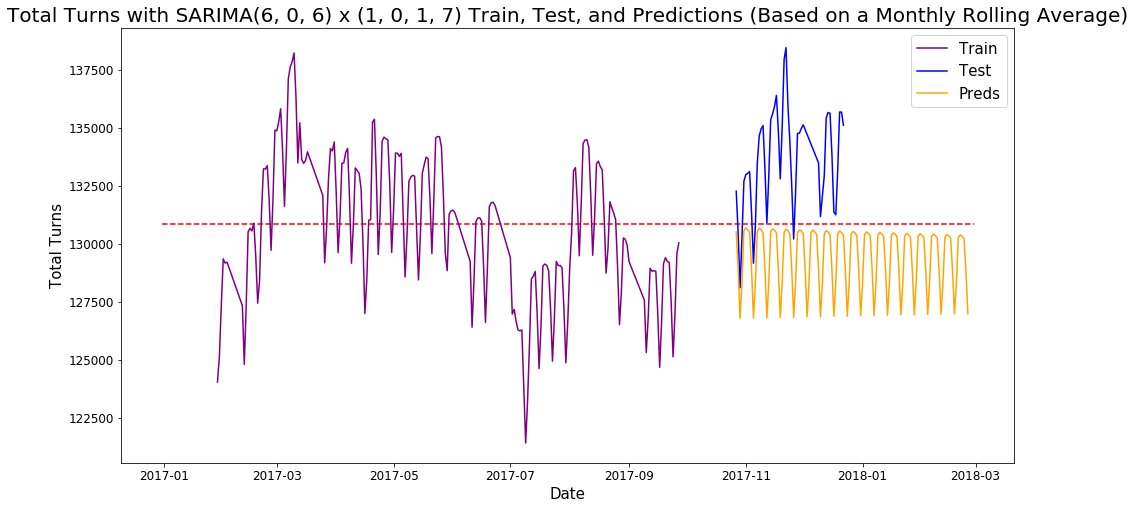

In [150]:
fig , (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16,8))

ax1.tick_params('x')
ax1.plot(port_train.index, port_train.rolling(30).mean(), label='Train', color = 'purple')
ax1.plot(port_test.index, port_test.rolling(30).mean(), label='Test', c='blue')
ax1.plot(pd.date_range(start = '2017-09-28', periods = 151), port_sarimax_pred_forcasting.rolling(30).mean(), label='Preds', color = 'orange')
plt.title(label = 'Total Turns with SARIMA(6, 0, 6) x (1, 0, 1, 7) Train, Test, and Predictions (Based on a Monthly Rolling Average)', fontsize=20)
plt.xlabel('Date', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Total Turns', fontsize = 15)
plt.yticks(fontsize = 12)
plt.hlines(y = port1['total_turns'].mean(), xmin=jksn_ht1.index[0], xmax = '2018-02-28', color = 'r', linestyles='--')

ax1.legend(fontsize = 15);

Our graph here shows the 30 day rolling average of the train data, test data, and our predicitons all in one. The red line represents the average of turns throughout the year and what we wanted to see was that our model can predict more than the average during the year. Our model shows that it actually sees a decrease happening in the amount of future turnstiles at this station as we see the predicitions fade father from the red line. This is caused by the model averaging out as we get farther and time and it becomes harder to predict.

While looking at this data

<Figure size 1152x576 with 0 Axes>

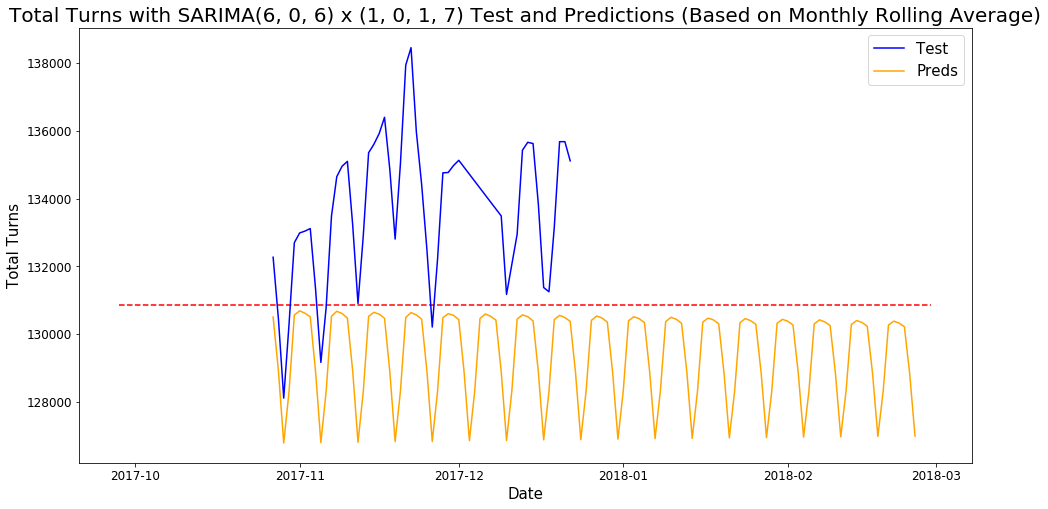

In [151]:
plt.figure(figsize=(16, 8))
fig , (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16,8))

ax1.plot(port_test.index, port_test.rolling(30).mean(), label='Test', c='blue')
ax1.plot(pd.date_range(start = '2017-09-28', periods = 151), port_sarimax_pred_forcasting.rolling(30).mean(), label='Preds', color = 'orange')
plt.title(label = 'Total Turns with SARIMA(6, 0, 6) x (1, 0, 1, 7) Test and Predictions (Based on Monthly Rolling Average)', fontsize=20)
plt.xlabel('Date', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Total Turns', fontsize = 15)
plt.yticks(fontsize = 12)
plt.hlines(y = port1['total_turns'].mean(), xmin=port_test.index[0], xmax='2018-02-28', color = 'r', linestyles='--')
ax1.legend(fontsize = 15);

In our test and predictions chart, you can clearly see that there is a discrepency in what the model is prediciting will happen compared to what actually happened. We see that the first week or so, that it is relatively consistant and then takes a jump ups. As a result from this showing here, we can say that the model may not score as good on higher turns station due to the high volume in possible change. This also shows that it may not be a good spot to look into opening up a Starbucks Store based on the model underprediciting the average as well as the close proximity of the three stores already

### Jackson Heights

In evalution of our time series model, we will want to focus in on the plotting of our residuals as well as plotting our forecast to see if the model is correctly predicting the trends.


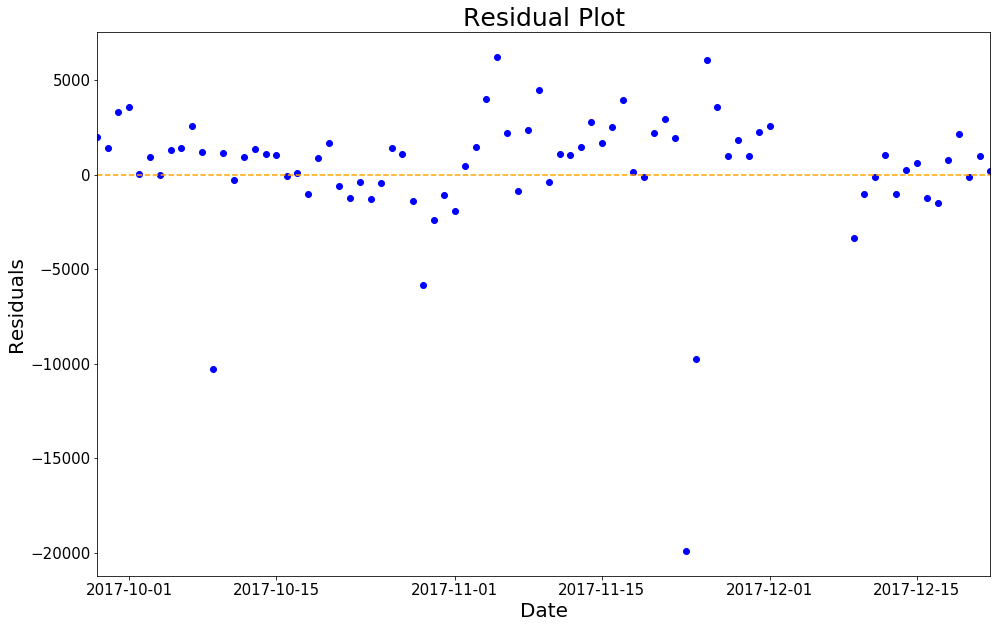

In [152]:
# Set figure size.
plt.figure(figsize=(16,10))

# Calculate residuals.
jack_resids = jack_test.values - jack_sarimax_pred.values

# Generate scatterplot of residuals.
plt.scatter(jack_test.index, jack_resids, c ='blue')

# Plot baseline at y=0.
plt.hlines(y = 0,
           color = 'orange',
           xmin = jack_test.index.min(),
           xmax = jack_test.index.max(),
           linestyles = '--')

# Set labels and axes.
plt.title('Residual Plot', fontsize= 25)
plt.xlabel('Date', fontsize = 20)
plt.xticks(fontsize=15)
plt.xlim(jack_test.index.min(), jack_test.index.max())
plt.yticks(fontsize=15)
plt.ylabel('Residuals', fontsize = 20);

As we evaluate the Jackson Heights residual plot, we notie a similar trend with the two data points located between the dates of 2017-11-15 and 2017-12-01 as these are both Thanksgigiving Day and the day after which would cause our actuals to be less then what we are predicting. For the most part though, we do see that the model does tend to under predict what is actually happening but yet, still follows some homoskadicity within it. 

(array([0.0e+00, 5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04, 2.5e-04, 3.0e-04]),
 <a list of 7 Text yticklabel objects>)

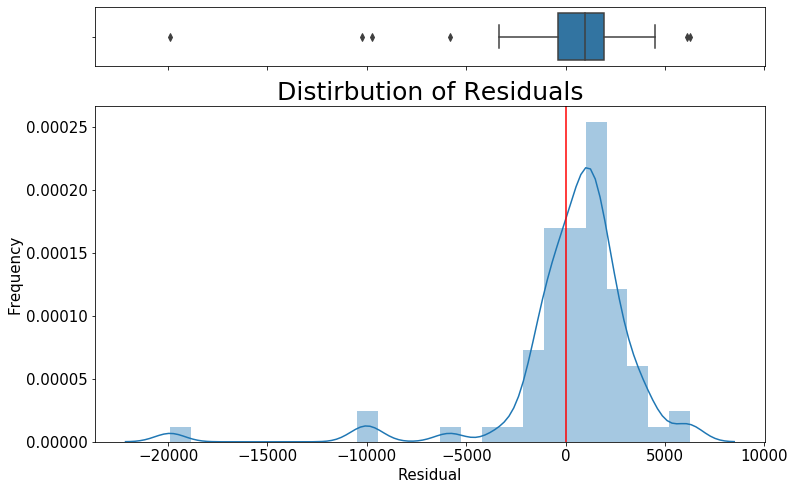

In [153]:

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2,figsize = (12,8), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(jack_resids, ax=ax_box)
sns.distplot(jack_resids, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.axvline(x = 0, c = 'red')
plt.title('Distirbution of Residuals', fontsize = 25)
plt.xlabel('Residual',fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.yticks(fontsize = 15)


As we can see from a dsitribution of our residuals, we can see that there is a few points that are ourside of the normal distribution due to holidays that occur every year. Our data does show that because of this, our data is skewed a little bit to the right which confirms to us that our predicitons are higher than our model. If there were more data that we could input to our model (ex prior years), i believe that the model would be able to pick up on this trend and possibly do a better job at reading that dip in the data. 

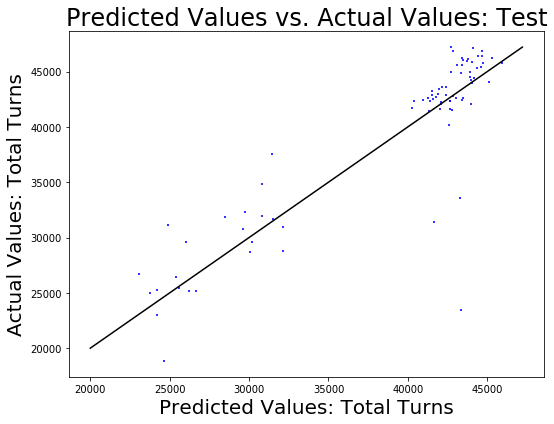

In [154]:
# Plot the Predict Test vs actual model
plt.figure(figsize=(8,6))

plt.scatter(jack_sarimax_pred, jack_test, s=5, color='blue',marker = '+', alpha = 0.8)

plt.plot([20000, np.max(jack_test)],
         [20000, np.max(jack_test)],
         color = 'black')
plt.xlabel("Predicted Values: Total Turns", fontsize = 20)
plt.ylabel("Actual Values: Total Turns", fontsize = 20)
plt.title('Predicted Values vs. Actual Values: Test', fontsize = 24)
plt.tight_layout();

The plot above also shows how our predicted faired against the actual values. What I would expect to see here is that there would be further points at the bottom due to unforseen circumstancs/ Holidays which would lead to less actual people going through the turnstiles. Although this plot seems that it is under predicting the model, the holiday points will lower predicitons but since these are every year points that must be considered, they cant be removed.  

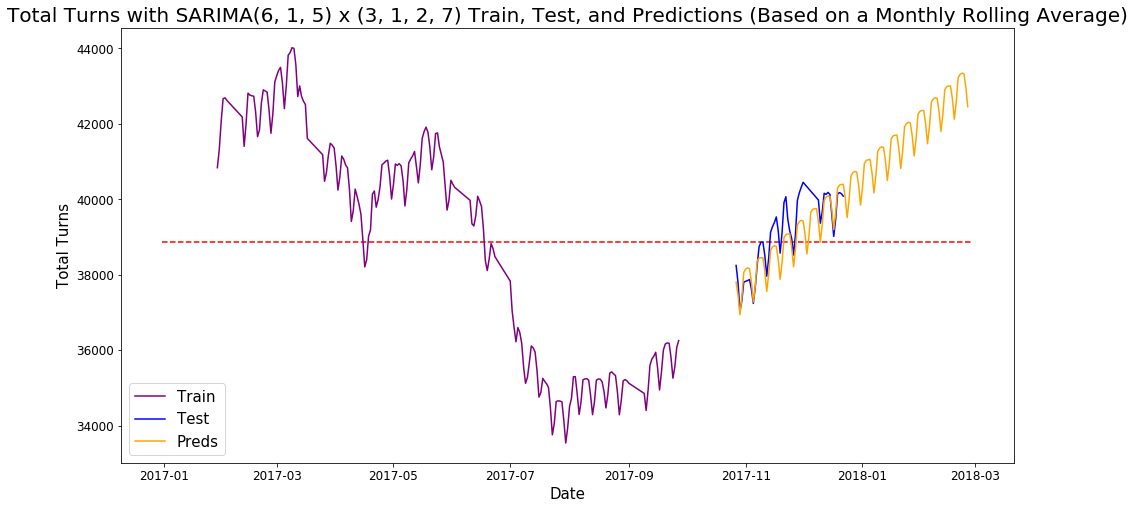

In [157]:
fig , (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16,8))

ax1.tick_params('x')
ax1.plot(jack_train.index, jack_train.rolling(30).mean(), label='Train', color = 'purple')
ax1.plot(jack_test.index, jack_test.rolling(30).mean(), label='Test', c='blue')
ax1.plot(pd.date_range(start = '2017-09-28', periods = 151), jack_sarimax_pred_forcasting.rolling(30).mean(), label='Preds', color = 'orange')
plt.title(label = 'Total Turns with SARIMA(6, 1, 5) x (3, 1, 2, 7) Train, Test, and Predictions (Based on a Monthly Rolling Average)', fontsize=20)
plt.xlabel('Date', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Total Turns', fontsize = 15)
plt.yticks(fontsize = 12)
plt.hlines(y = jksn_ht1['total_turns'].mean(), xmin=jksn_ht1.index[0], xmax = '2018-02-28', color = 'r', linestyles='--')

ax1.legend(fontsize = 15);



Shown in graph above, our model is showing an upwards trend within our data and forecasting out further that our model will predict greater than the average total turns which is a positive thing for us to see. However, I would proceed with caution on this. Since we are only predicitng based on small window, I would say that we should monitor future activity and see if there if this continues to be a trend. 

<Figure size 1152x576 with 0 Axes>

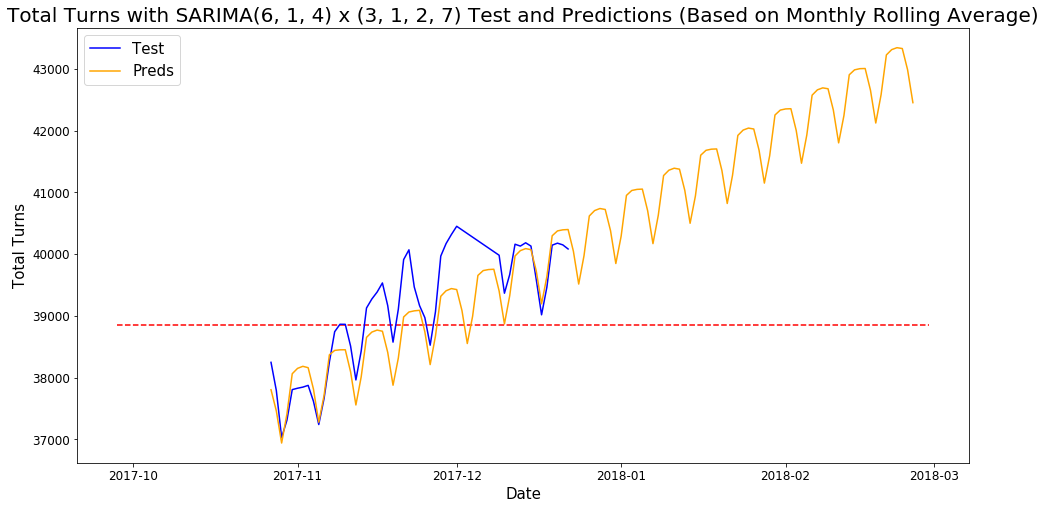

In [158]:
plt.figure(figsize=(16, 8))
fig , (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16,8))

ax1.plot(jack_test.index, jack_test.rolling(30).mean(), label='Test', c='blue')
ax1.plot(pd.date_range(start = '2017-09-28', periods = 151), jack_sarimax_pred_forcasting.rolling(30).mean(), label='Preds', color = 'orange')
plt.title(label = 'Total Turns with SARIMA(6, 1, 4) x (3, 1, 2, 7) Test and Predictions (Based on Monthly Rolling Average)', fontsize=20)
plt.xlabel('Date', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Total Turns', fontsize = 15)
plt.yticks(fontsize = 12)
plt.hlines(y = jksn_ht1['total_turns'].mean(), xmin=jack_test.index[0], xmax='2018-02-28', color = 'r', linestyles='--')
ax1.legend(fontsize = 15);

Above graph just shows a more focused graph on what is happening above with the test and the predictions. As you can see for he most part of the three month stretch, predicitons do tend to be smaller than the actuals that are happening. Due to this also being a monthly rolling average, we wont see the sudden dip to show the holidays atually being lower than the predicitons but we will have a better understanding of how the trends tend to be.

## Conclusion and Next Steps:

In our conclusion, we are able to say that we were able to build a successful model to determine whether or not we can beat the average turnstiles per year at a certain station. We can also say that although our model is predicting like we wanted too on both stations in which we didn't expect to see much of a change in our predictions vs our actual for Port Authority and we we had a positive trend in our model for Jackson Heights, this model still needs more data to ensure its accuracy over a longer period of time. We were able to see by our residuals and predictions that for the most part, our model was tending to predict on the more conservative side in which we some of the actual data tended to be a little more volatile but we were able to see clear and obvious trends that showed that there are positive trends in our dataset

Even with limited data, I would still recommend Starbucks to look into that area as a means of possible expansion. Unlike what we saw for Port Authority, our SARIMA model for Jackson heights did show an positive trend with its predictions to give us hope that with this information along with seeing that there were not a lot of Starbucks that were close by, hope that it could be a target area. Other findings that we saw would be that the best time, if they were to proceed, would be to look at openings more in the fall as 3 of the top 4 months seem to come at the end of the year as well as Wednesday being the day to open as it showed to be the day that did have the most foot traffic happening during the week.

Moving forward I would like to try to fit this model on the next several stations to see if similar results for high turnstile data would yeild more stationary results as well as a maybe not as high turnstile station would yielf a more dynamic result. Two stations in specific I would like to see would be Court Sq and Queens plaza. Both of these stations, from the information that we were able to gather, have promise in being another up and coming area. These are also two stations that seems to have fewer Starbucks within the area. From seeing trends in the past few years these are stations that are located within Long Island City which has seen a spike in real estate prices and could prove to be a great opportunity. 

Another step I would like to look at going forward would be to test this over the other three quarters of the year granted that we only really had analysis on October, November and December and used that into predicting January and February. With that problem, we saw certain residuals on which our model was over predicting because it doesn't know how to exactly handle holidays yet because its never seen it before on a prior year. If we were to have several other years of data, I believe that the model would be able to pick up on this trend happening and give a more accurate prediction into those certain days where there are less people going through turnstiles during different points in the year.